In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# Loading the Property Data

In [2]:
data=pd.read_csv("Property_data.csv")
data

PropertyID  PropertyClass PropertyZone  PropertyFrontage  PropertySize  \
0              1             60           RL              65.0          8450   
1              2             20           RL              80.0          9600   
2              3             60           RL              68.0         11250   
3              4             70           RL              60.0          9550   
4              5             60           RL              84.0         14260   
...          ...            ...          ...               ...           ...   
1455        1456             60           RL              62.0          7917   
1456        1457             20           RL              85.0         13175   
1457        1458             70           RL              66.0          9042   
1458        1459             20           RL              68.0          9717   
1459        1460             20           RL              75.0          9937   

     Street Alley PropertyShape Elevation Amenities  ... PoolArea PoolQC  \
0      Pave   NaN           Reg       Lvl    AllPub  ...        0    NaN   
1      Pave   NaN           Reg       Lvl    AllPub  ...        0    NaN   
2      Pave   NaN           IR1       Lvl    AllPub  ...        0    NaN   
3      Pave   NaN           IR1       Lvl    AllPub  ...        0    NaN   
4      Pave   NaN           IR1       Lvl    AllPub  ...        0    NaN   
...     ...   ...           ...       ...       ...  ...      ...    ...   
1455   Pave   NaN           Reg       Lvl    AllPub  ...        0    NaN   
1456   Pave   NaN           Reg       Lvl    AllPub  ...        0    NaN   
1457   Pave   NaN           Reg       Lvl    AllPub  ...        0    NaN   
1458   Pave   NaN           Reg       Lvl    AllPub  ...        0    NaN   
1459   Pave   NaN           Reg       Lvl    AllPub  ...        0    NaN   

     BoundaryFeatures AddFeatures AddVal SaleMon SaleYr  SaleType  SaleCondn  \
0                 NaN         NaN      0       2   2008        WD     Normal   
1                 NaN         NaN      0       5   2007        WD     Normal   
2                 NaN         NaN      0       9   2008        WD     Normal   
3                 NaN         NaN      0       2   2006        WD    Abnorml   
4                 NaN         NaN      0      12   2008        WD     Normal   
...               ...         ...    ...     ...    ...       ...        ...   
1455              NaN         NaN      0       8   2007        WD     Normal   
1456            MnPrv         NaN      0       2   2010        WD     Normal   
1457            GdPrv        Shed   2500       5   2010        WD     Normal   
1458              NaN         NaN      0       4   2010        WD     Normal   
1459              NaN         NaN      0       6   2008        WD     Normal   

      PropPrice  
0        208500  
1        181500  
2        223500  
3        140000  
4        250000  
...         ...  
1455     175000  
1456     210000  
1457     266500  
1458     142125  
1459     147500  

[1460 rows x 81 columns]

In [3]:
data.head()

PropertyID  PropertyClass PropertyZone  PropertyFrontage  PropertySize  \
0           1             60           RL              65.0          8450   
1           2             20           RL              80.0          9600   
2           3             60           RL              68.0         11250   
3           4             70           RL              60.0          9550   
4           5             60           RL              84.0         14260   

  Street Alley PropertyShape Elevation Amenities  ... PoolArea PoolQC  \
0   Pave   NaN           Reg       Lvl    AllPub  ...        0    NaN   
1   Pave   NaN           Reg       Lvl    AllPub  ...        0    NaN   
2   Pave   NaN           IR1       Lvl    AllPub  ...        0    NaN   
3   Pave   NaN           IR1       Lvl    AllPub  ...        0    NaN   
4   Pave   NaN           IR1       Lvl    AllPub  ...        0    NaN   

  BoundaryFeatures AddFeatures AddVal SaleMon SaleYr  SaleType  SaleCondn  \
0              NaN         NaN      0       2   2008        WD     Normal   
1              NaN         NaN      0       5   2007        WD     Normal   
2              NaN         NaN      0       9   2008        WD     Normal   
3              NaN         NaN      0       2   2006        WD    Abnorml   
4              NaN         NaN      0      12   2008        WD     Normal   

   PropPrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 81 columns]

In [4]:
data.tail()

PropertyID  PropertyClass PropertyZone  PropertyFrontage  PropertySize  \
1455        1456             60           RL              62.0          7917   
1456        1457             20           RL              85.0         13175   
1457        1458             70           RL              66.0          9042   
1458        1459             20           RL              68.0          9717   
1459        1460             20           RL              75.0          9937   

     Street Alley PropertyShape Elevation Amenities  ... PoolArea PoolQC  \
1455   Pave   NaN           Reg       Lvl    AllPub  ...        0    NaN   
1456   Pave   NaN           Reg       Lvl    AllPub  ...        0    NaN   
1457   Pave   NaN           Reg       Lvl    AllPub  ...        0    NaN   
1458   Pave   NaN           Reg       Lvl    AllPub  ...        0    NaN   
1459   Pave   NaN           Reg       Lvl    AllPub  ...        0    NaN   

     BoundaryFeatures AddFeatures AddVal SaleMon SaleYr  SaleType  SaleCondn  \
1455              NaN         NaN      0       8   2007        WD     Normal   
1456            MnPrv         NaN      0       2   2010        WD     Normal   
1457            GdPrv        Shed   2500       5   2010        WD     Normal   
1458              NaN         NaN      0       4   2010        WD     Normal   
1459              NaN         NaN      0       6   2008        WD     Normal   

      PropPrice  
1455     175000  
1456     210000  
1457     266500  
1458     142125  
1459     147500  

[5 rows x 81 columns]

In [5]:
data.shape

(1460, 81)

In [6]:
data.dtypes

PropertyID            int64
PropertyClass         int64
PropertyZone         object
PropertyFrontage    float64
PropertySize          int64
                     ...   
SaleMon               int64
SaleYr                int64
SaleType             object
SaleCondn            object
PropPrice             int64
Length: 81, dtype: object

In [7]:
data.describe()

PropertyID  PropertyClass  PropertyFrontage   PropertySize  \
count  1460.000000    1460.000000       1201.000000    1460.000000   
mean    730.500000      56.897260         70.049958   10516.828082   
std     421.610009      42.300571         24.284752    9981.264932   
min       1.000000      20.000000         21.000000    1300.000000   
25%     365.750000      20.000000         59.000000    7553.500000   
50%     730.500000      50.000000         69.000000    9478.500000   
75%    1095.250000      70.000000         80.000000   11601.500000   
max    1460.000000     190.000000        313.000000  215245.000000   

       OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count  1460.000000  1460.000000  1460.000000   1460.000000   
mean      6.099315     5.575342  1971.267808   1984.865753   
std       1.382997     1.112799    30.202904     20.645407   
min       1.000000     1.000000  1872.000000   1950.000000   
25%       5.000000     5.000000  1954.000000   1967.000000   
50%       6.000000     5.000000  1973.000000   1994.000000   
75%       7.000000     6.000000  2000.000000   2004.000000   
max      10.000000     9.000000  2010.000000   2010.000000   

       ExteriorCladdingArea  BsmntFinSty1  ...   WoodDeckSF  OpenPorchSF  \
count           1452.000000   1460.000000  ...  1460.000000  1460.000000   
mean             103.685262    443.639726  ...    94.244521    46.660274   
std              181.066207    456.098091  ...   125.338794    66.256028   
min                0.000000      0.000000  ...     0.000000     0.000000   
25%                0.000000      0.000000  ...     0.000000     0.000000   
50%                0.000000    383.500000  ...     0.000000    25.000000   
75%              166.000000    712.250000  ...   168.000000    68.000000   
max             1600.000000   5644.000000  ...   857.000000   547.000000   

       EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea        AddVal  \
count    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean       21.954110     3.409589    15.060959     2.758904     43.489041   
std        61.119149    29.317331    55.757415    40.177307    496.123024   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000     0.000000      0.000000   
50%         0.000000     0.000000     0.000000     0.000000      0.000000   
75%         0.000000     0.000000     0.000000     0.000000      0.000000   
max       552.000000   508.000000   480.000000   738.000000  15500.000000   

           SaleMon       SaleYr      PropPrice  
count  1460.000000  1460.000000    1460.000000  
mean      6.321918  2007.815753  180921.195890  
std       2.703626     1.328095   79442.502883  
min       1.000000  2006.000000   34900.000000  
25%       5.000000  2007.000000  129975.000000  
50%       6.000000  2008.000000  163000.000000  
75%       8.000000  2009.000000  214000.000000  
max      12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PropertyID            1460 non-null   int64  
 1   PropertyClass         1460 non-null   int64  
 2   PropertyZone          1460 non-null   object 
 3   PropertyFrontage      1201 non-null   float64
 4   PropertySize          1460 non-null   int64  
 5   Street                1460 non-null   object 
 6   Alley                 91 non-null     object 
 7   PropertyShape         1460 non-null   object 
 8   Elevation             1460 non-null   object 
 9   Amenities             1460 non-null   object 
 10  Orientation           1460 non-null   object 
 11  Grade                 1460 non-null   object 
 12  Neighborhood          1460 non-null   object 
 13  Condition1            1460 non-null   object 
 14  Condition2            1460 non-null   object 
 15  BldgType             

In [9]:
data.isnull().sum()

PropertyID            0
PropertyClass         0
PropertyZone          0
PropertyFrontage    259
PropertySize          0
                   ... 
SaleMon               0
SaleYr                0
SaleType              0
SaleCondn             0
PropPrice             0
Length: 81, dtype: int64

In [10]:
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

PropertyFrontage         259
Alley                   1369
ExteriorCladdingType     872
ExteriorCladdingArea       8
BsmntFinish               37
BsmntMaintenance          37
BsmntVisibility           38
BsmntFinRat1              37
BsmntFinQual1             38
Electrical                 1
QualFireplace            690
BasementType              81
BasementYrBlt             81
BasementFinish            81
BasementQual              81
BasementCond              81
PoolQC                  1453
BoundaryFeatures        1179
AddFeatures             1406
dtype: int64


In [11]:
data = data.drop(columns=['PropertyID', 'Alley', 'PoolQC', 'BoundaryFeatures', 'AddFeatures', 'QualFireplace','ExteriorCladdingType'])
data

PropertyClass PropertyZone  PropertyFrontage  PropertySize Street  \
0                60           RL              65.0          8450   Pave   
1                20           RL              80.0          9600   Pave   
2                60           RL              68.0         11250   Pave   
3                70           RL              60.0          9550   Pave   
4                60           RL              84.0         14260   Pave   
...             ...          ...               ...           ...    ...   
1455             60           RL              62.0          7917   Pave   
1456             20           RL              85.0         13175   Pave   
1457             70           RL              66.0          9042   Pave   
1458             20           RL              68.0          9717   Pave   
1459             20           RL              75.0          9937   Pave   

     PropertyShape Elevation Amenities Orientation Grade  ... EnclosedPorch  \
0              Reg       Lvl    AllPub      Inside   Gtl  ...             0   
1              Reg       Lvl    AllPub         FR2   Gtl  ...             0   
2              IR1       Lvl    AllPub      Inside   Gtl  ...             0   
3              IR1       Lvl    AllPub      Corner   Gtl  ...           272   
4              IR1       Lvl    AllPub         FR2   Gtl  ...             0   
...            ...       ...       ...         ...   ...  ...           ...   
1455           Reg       Lvl    AllPub      Inside   Gtl  ...             0   
1456           Reg       Lvl    AllPub      Inside   Gtl  ...             0   
1457           Reg       Lvl    AllPub      Inside   Gtl  ...             0   
1458           Reg       Lvl    AllPub      Inside   Gtl  ...           112   
1459           Reg       Lvl    AllPub      Inside   Gtl  ...             0   

     3SsnPorch ScreenPorch PoolArea AddVal  SaleMon  SaleYr  SaleType  \
0            0           0        0      0        2    2008        WD   
1            0           0        0      0        5    2007        WD   
2            0           0        0      0        9    2008        WD   
3            0           0        0      0        2    2006        WD   
4            0           0        0      0       12    2008        WD   
...        ...         ...      ...    ...      ...     ...       ...   
1455         0           0        0      0        8    2007        WD   
1456         0           0        0      0        2    2010        WD   
1457         0           0        0   2500        5    2010        WD   
1458         0           0        0      0        4    2010        WD   
1459         0           0        0      0        6    2008        WD   

      SaleCondn PropPrice  
0        Normal    208500  
1        Normal    181500  
2        Normal    223500  
3       Abnorml    140000  
4        Normal    250000  
...         ...       ...  
1455     Normal    175000  
1456     Normal    210000  
1457     Normal    266500  
1458     Normal    142125  
1459     Normal    147500  

[1460 rows x 74 columns]

In [12]:
data.duplicated().sum()

0

In [13]:
columns = data.columns
columns

Index(['PropertyClass', 'PropertyZone', 'PropertyFrontage', 'PropertySize',
       'Street', 'PropertyShape', 'Elevation', 'Amenities', 'Orientation',
       'Grade', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'PropertyStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Roof1Material',
       'Roof2Material', 'ExteriorCladdingArea', 'ExterQual', 'ExterCond',
       'PropertyFooting', 'BsmntFinish', 'BsmntMaintenance', 'BsmntVisibility',
       'BsmntFinRat1', 'BsmntFinSty1', 'BsmntFinQual1', 'BsmtFinSF2',
       'BsmtUnfSF', 'BsmntSqFtage', 'Heating', 'HeatingEfficiency',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'Bath1', 'Bath2',
       'BedroomUpLev', 'KitchenUpLev', 'KitchenQual', 'CntRmsUpLev',
       'Functional', 'CntFireplaces', 'BasementType', 'BasementYrBlt',
       'BasementFinish', 'BasementCars', 'BasementSqFootage', 'Basem

In [14]:
# Identify the numerical and the categorical columns as:
numerical_columns = data.select_dtypes(include=['number']).columns.to_list()
categorical_columns = data.select_dtypes(include=['object']).columns.to_list()

In [15]:
numerical_columns

['PropertyClass',
 'PropertyFrontage',
 'PropertySize',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'ExteriorCladdingArea',
 'BsmntFinSty1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'BsmntSqFtage',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'Bath1',
 'Bath2',
 'BedroomUpLev',
 'KitchenUpLev',
 'CntRmsUpLev',
 'CntFireplaces',
 'BasementYrBlt',
 'BasementCars',
 'BasementSqFootage',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'AddVal',
 'SaleMon',
 'SaleYr',
 'PropPrice']

In [16]:
categorical_columns

['PropertyZone',
 'Street',
 'PropertyShape',
 'Elevation',
 'Amenities',
 'Orientation',
 'Grade',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'PropertyStyle',
 'RoofStyle',
 'RoofMatl',
 'Roof1Material',
 'Roof2Material',
 'ExterQual',
 'ExterCond',
 'PropertyFooting',
 'BsmntFinish',
 'BsmntMaintenance',
 'BsmntVisibility',
 'BsmntFinRat1',
 'BsmntFinQual1',
 'Heating',
 'HeatingEfficiency',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'BasementType',
 'BasementFinish',
 'BasementQual',
 'BasementCond',
 'PavedDrive',
 'SaleType',
 'SaleCondn']

In [17]:
mean_property_frontage = data['PropertyFrontage'].mean().round(2)
mean_property_frontage

70.05

In [18]:
data['PropertyFrontage'].fillna(mean_property_frontage, inplace=True)

In [19]:
data['PropertyFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: PropertyFrontage, Length: 1460, dtype: float64

In [20]:
data['PropertyFrontage'].isnull().sum()

0

In [21]:
threshold = 1.5

In [22]:
numerical_columns = data.select_dtypes(include=['number'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numerical column
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)

# Calculate IQR for each numerical column
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers_iqr = (numerical_columns < (Q1 - threshold * IQR)) | (numerical_columns > (Q3 + threshold * IQR))

# Print the result to see which values are identified as outliers
print(outliers_iqr)

      PropertyClass  PropertyFrontage  PropertySize  OverallQual  OverallCond  \
0             False             False         False        False        False   
1             False             False         False        False         True   
2             False             False         False        False        False   
3             False             False         False        False        False   
4             False             False         False        False        False   
...             ...               ...           ...          ...          ...   
1455          False             False         False        False        False   
1456          False             False         False        False        False   
1457          False             False         False        False         True   
1458          False             False         False        False        False   
1459          False             False         False        False        False   

      YearBuilt  YearRemodA

In [23]:
outliers_iqr.sum()

PropertyClass           103
PropertyFrontage        106
PropertySize             69
OverallQual               2
OverallCond             125
YearBuilt                 7
YearRemodAdd              0
ExteriorCladdingArea     96
BsmntFinSty1              7
BsmtFinSF2              167
BsmtUnfSF                29
BsmntSqFtage             61
1stFlrSF                 20
2ndFlrSF                  2
LowQualFinSF             26
GrLivArea                31
BsmtFullBath              1
BsmtHalfBath             82
Bath1                     0
Bath2                     0
BedroomUpLev             35
KitchenUpLev             68
CntRmsUpLev              30
CntFireplaces             5
BasementYrBlt             0
BasementCars              5
BasementSqFootage        21
WoodDeckSF               32
OpenPorchSF              77
EnclosedPorch           208
3SsnPorch                24
ScreenPorch             116
PoolArea                  7
AddVal                   52
SaleMon                   0
SaleYr              

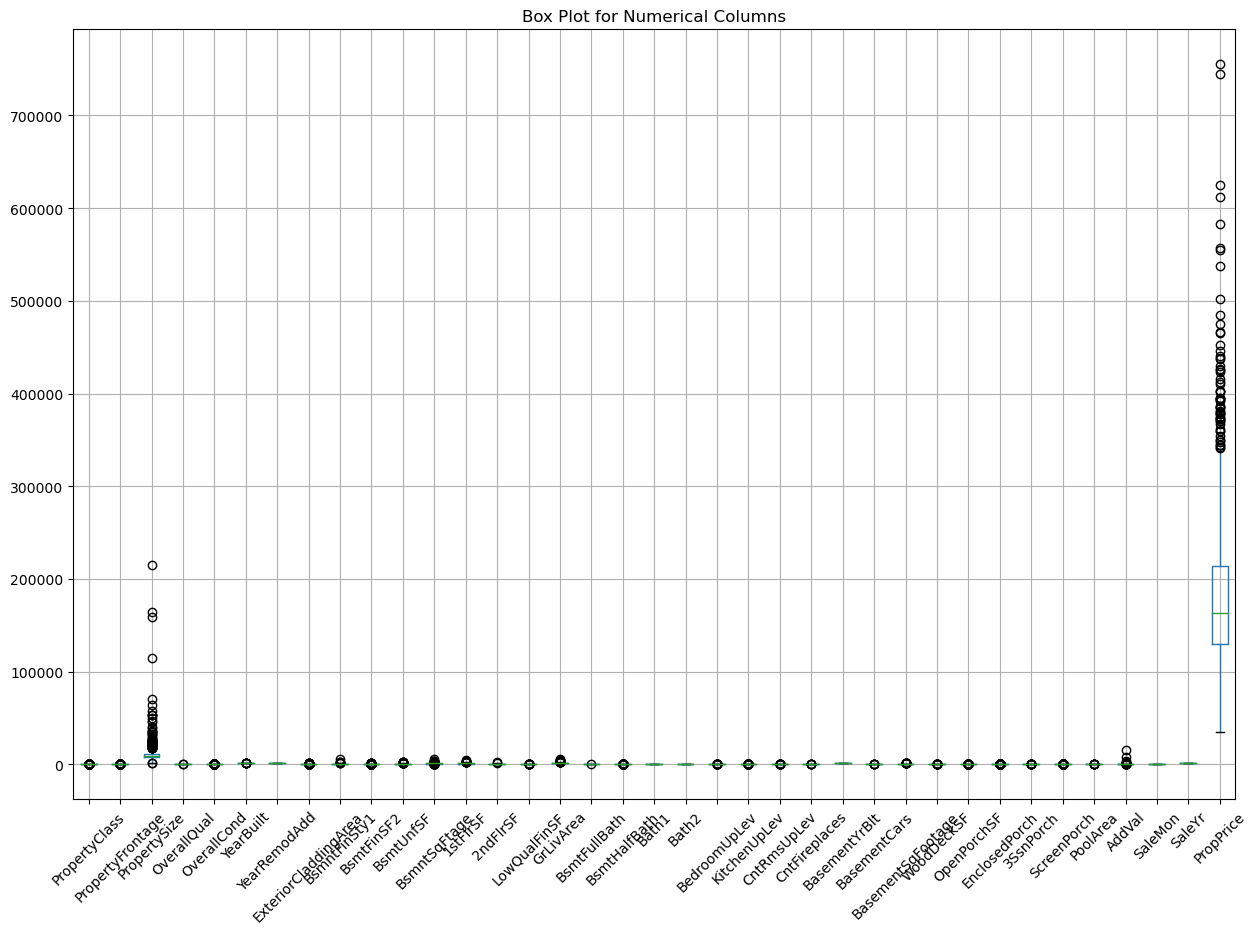

In [24]:
numerical_columns = data.select_dtypes(include=['number'])

# Define the size of the figure
plt.figure(figsize=(15, 10))

# Plot box plots for each numerical column
numerical_columns.boxplot()

# Show the plot
plt.title('Box Plot for Numerical Columns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

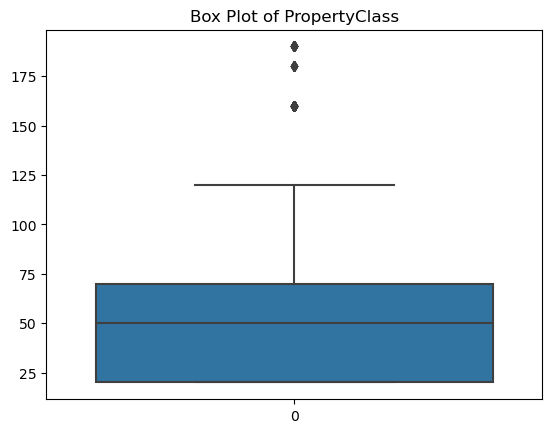

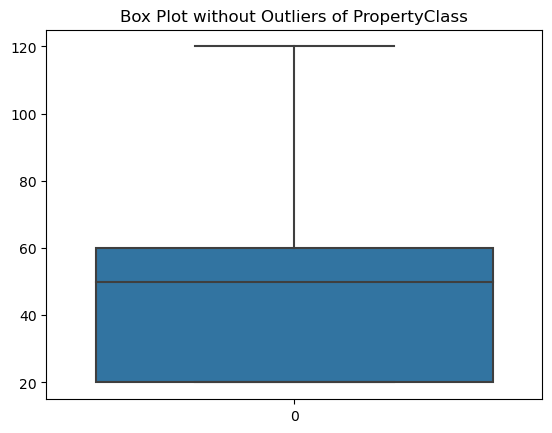

In [25]:
def removal_box_plot(data, column, threshold):
    sns.boxplot(data[column])
    plt.title(f'Box Plot of {column}')
    plt.show()
    
    # Remove outliers
    removed_outliers = data[data[column] <= threshold]
    
    # Check if there are any rows left
    if removed_outliers.empty:
        print("No data left after removing outliers.")
    else:
        sns.boxplot(removed_outliers[column])
        plt.title(f'Box Plot without Outliers of {column}')
        plt.show()

threshold_value = 150
no_outliers = removal_box_plot(data, 'PropertyClass', threshold_value)

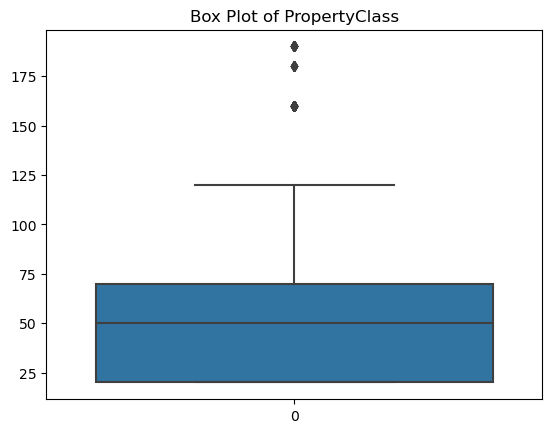

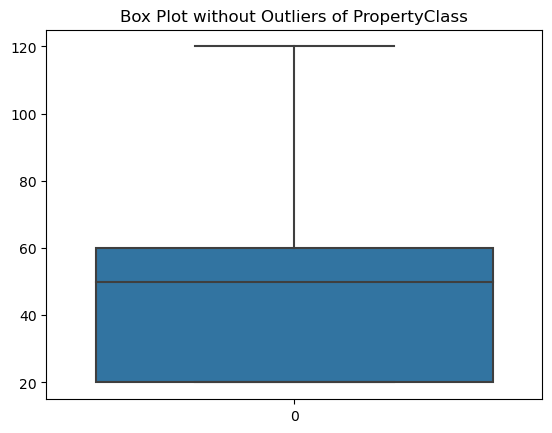

Skipping column 'PropertyZone' as it contains non-numeric data.


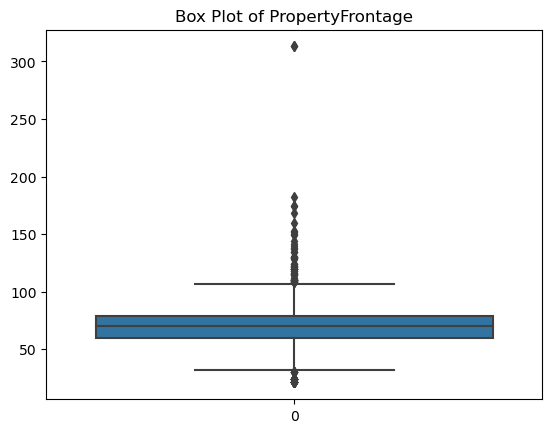

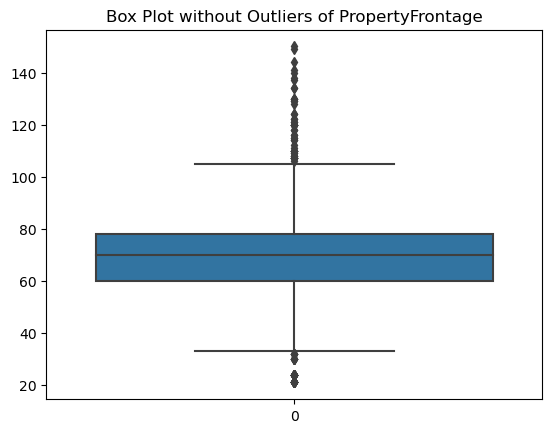

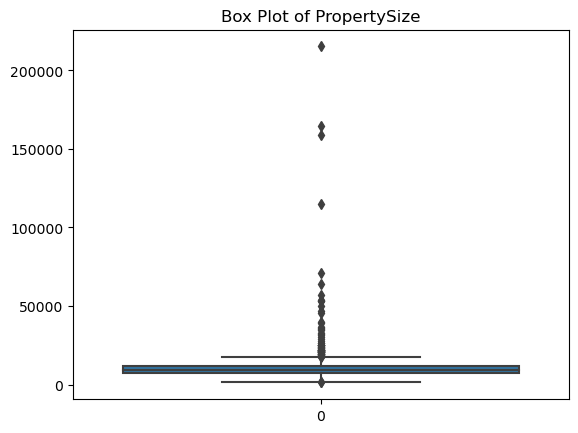

No data left after removing outliers in column 'PropertySize'.
Skipping column 'Street' as it contains non-numeric data.
Skipping column 'PropertyShape' as it contains non-numeric data.
Skipping column 'Elevation' as it contains non-numeric data.
Skipping column 'Amenities' as it contains non-numeric data.
Skipping column 'Orientation' as it contains non-numeric data.
Skipping column 'Grade' as it contains non-numeric data.
Skipping column 'Neighborhood' as it contains non-numeric data.
Skipping column 'Condition1' as it contains non-numeric data.
Skipping column 'Condition2' as it contains non-numeric data.
Skipping column 'BldgType' as it contains non-numeric data.
Skipping column 'PropertyStyle' as it contains non-numeric data.


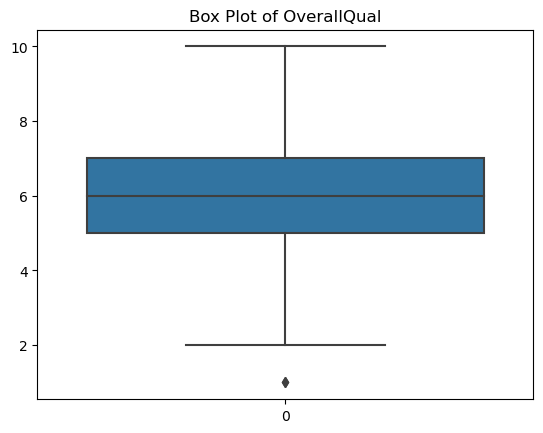

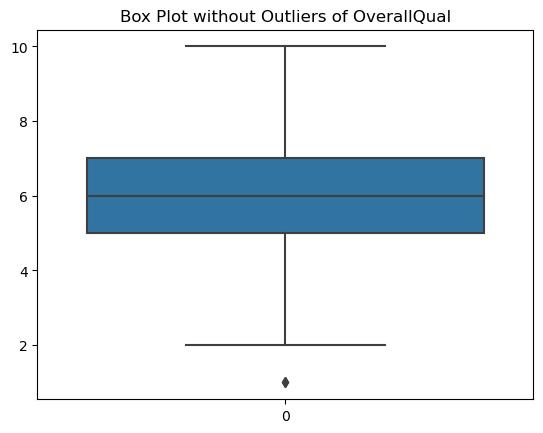

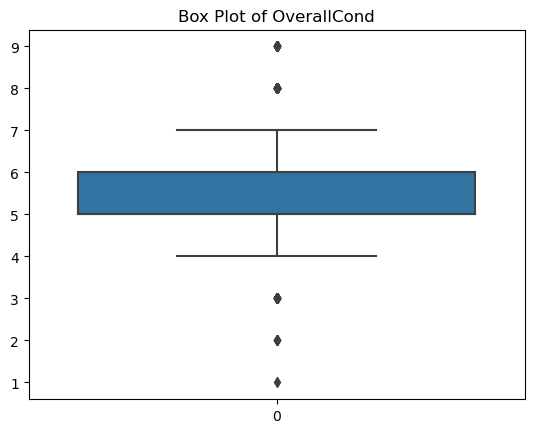

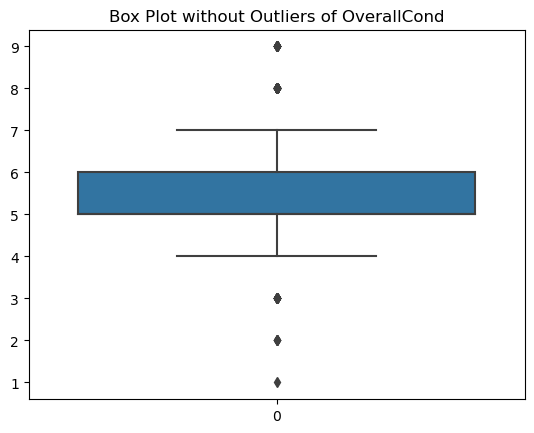

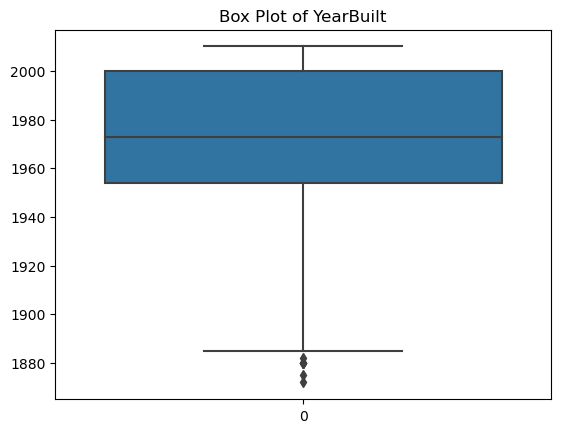

No data left after removing outliers in column 'YearBuilt'.


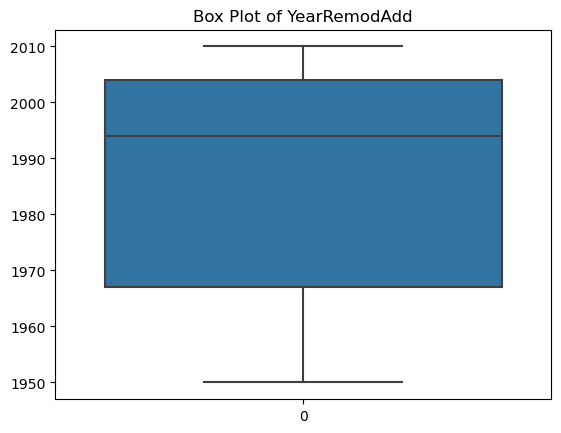

No data left after removing outliers in column 'YearRemodAdd'.
Skipping column 'RoofStyle' as it contains non-numeric data.
Skipping column 'RoofMatl' as it contains non-numeric data.
Skipping column 'Roof1Material' as it contains non-numeric data.
Skipping column 'Roof2Material' as it contains non-numeric data.


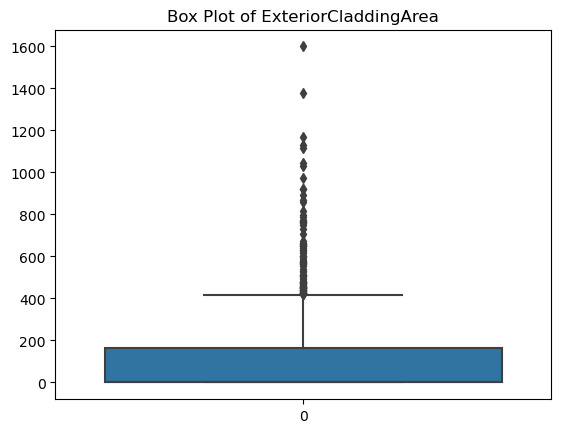

Skipping column 'ExterQual' as it contains non-numeric data.
Skipping column 'ExterCond' as it contains non-numeric data.
Skipping column 'PropertyFooting' as it contains non-numeric data.
Skipping column 'BsmntFinish' as it contains non-numeric data.
Skipping column 'BsmntMaintenance' as it contains non-numeric data.
Skipping column 'BsmntVisibility' as it contains non-numeric data.
Skipping column 'BsmntFinRat1' as it contains non-numeric data.


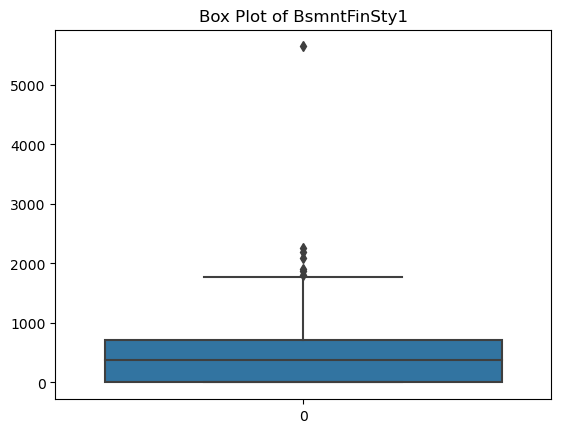

Skipping column 'BsmntFinQual1' as it contains non-numeric data.


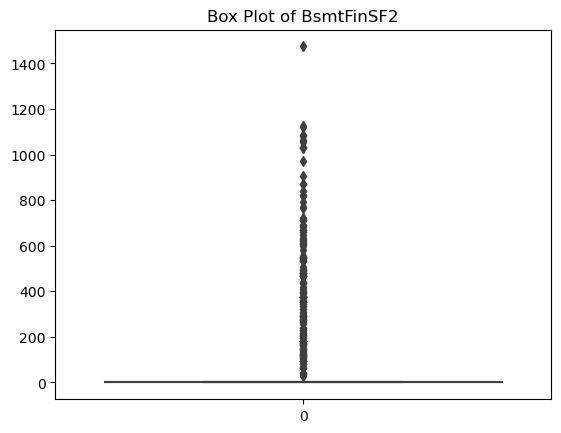

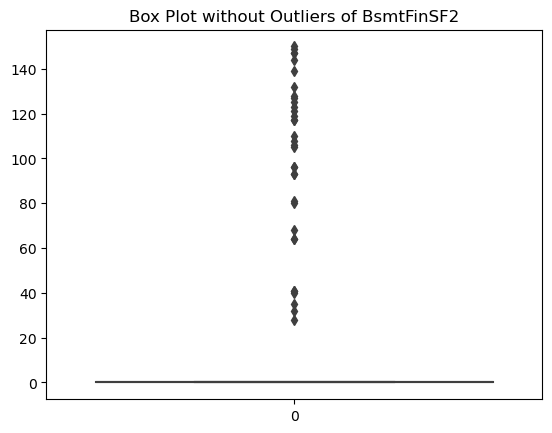

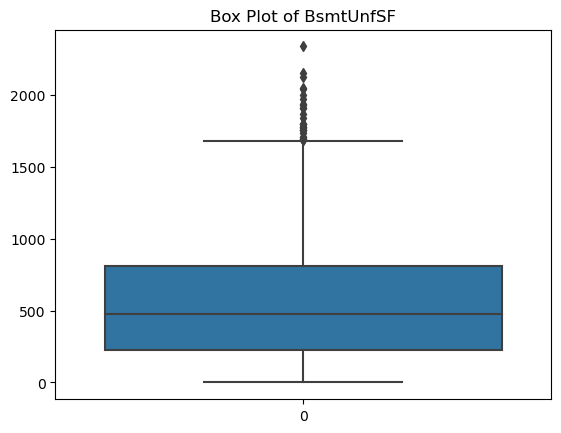

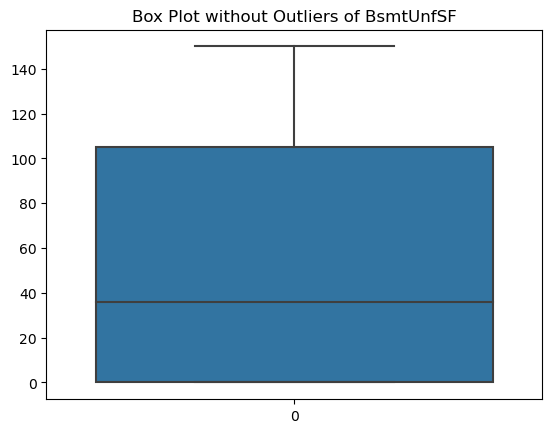

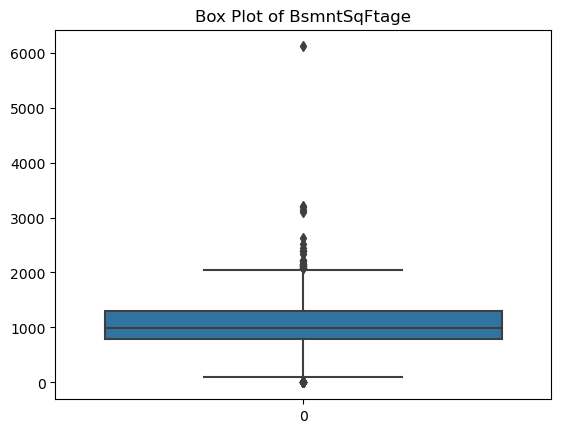

Skipping column 'Heating' as it contains non-numeric data.
Skipping column 'HeatingEfficiency' as it contains non-numeric data.
Skipping column 'CentralAir' as it contains non-numeric data.
Skipping column 'Electrical' as it contains non-numeric data.


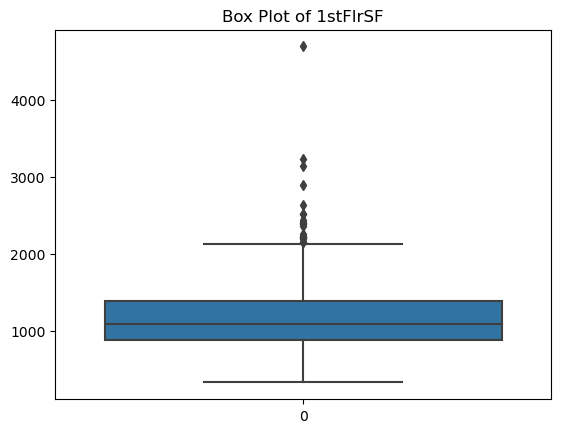

No data left after removing outliers in column '1stFlrSF'.


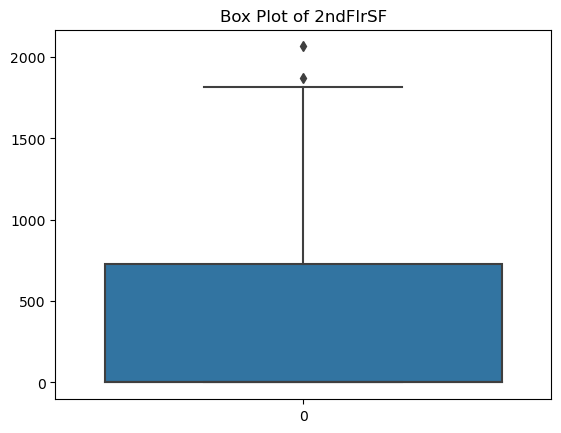

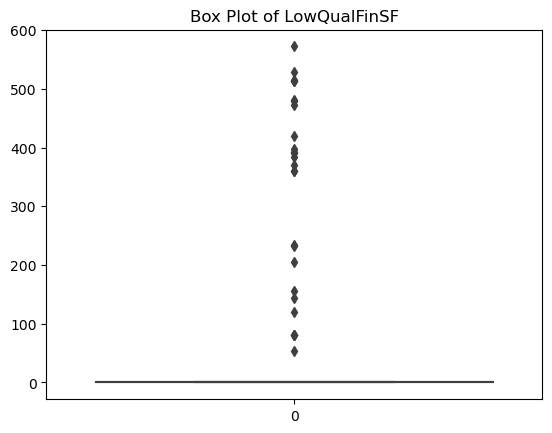

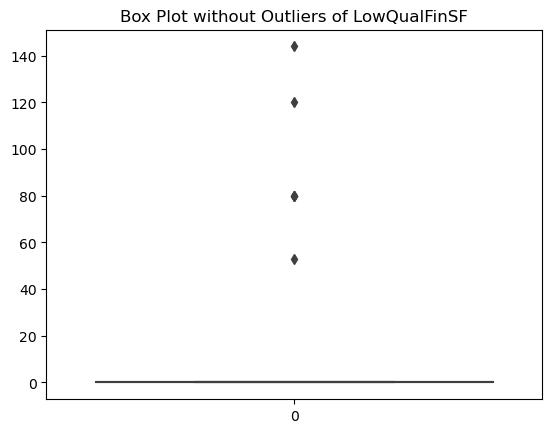

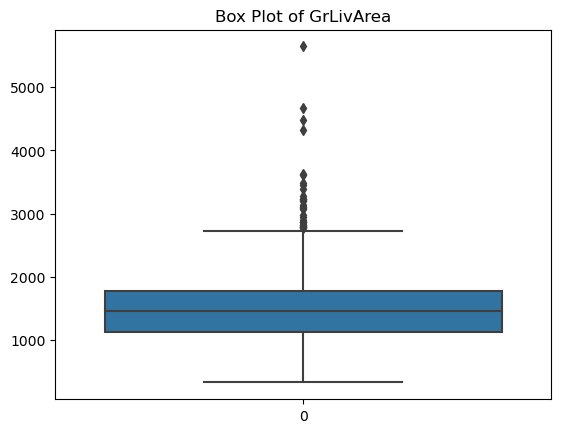

No data left after removing outliers in column 'GrLivArea'.


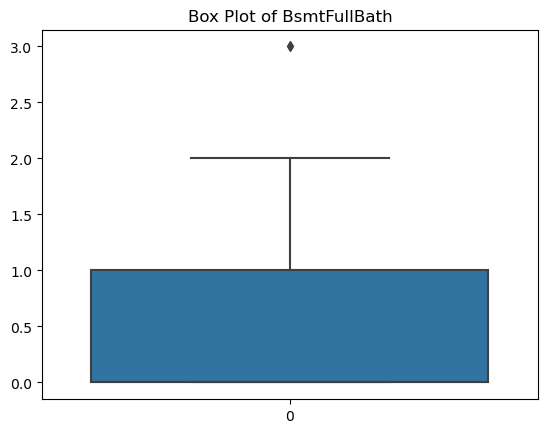

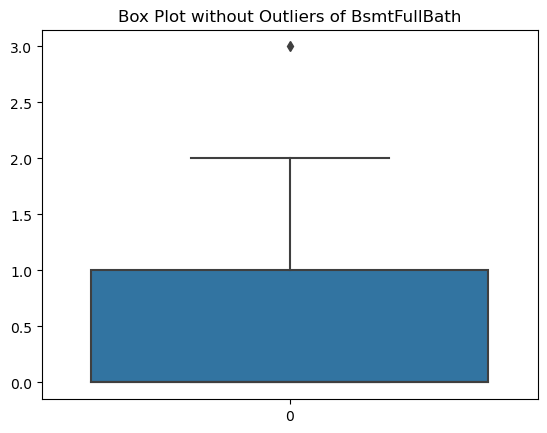

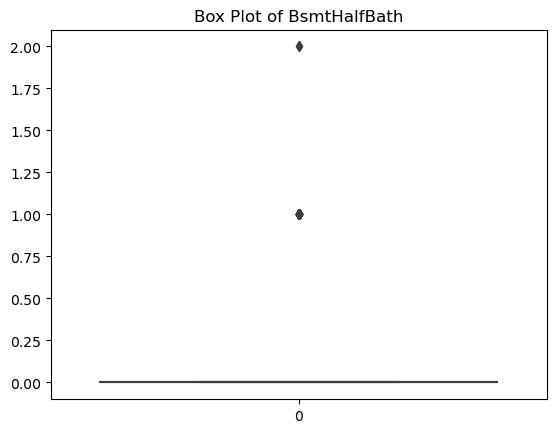

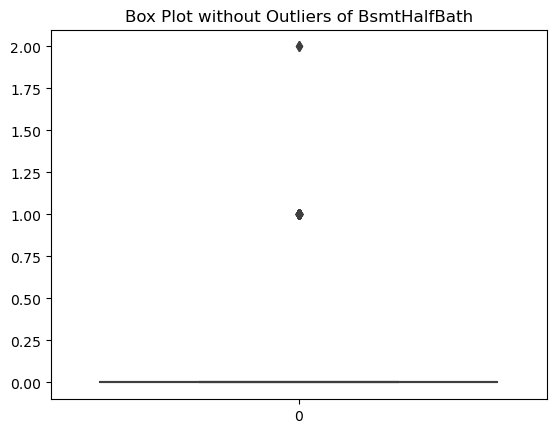

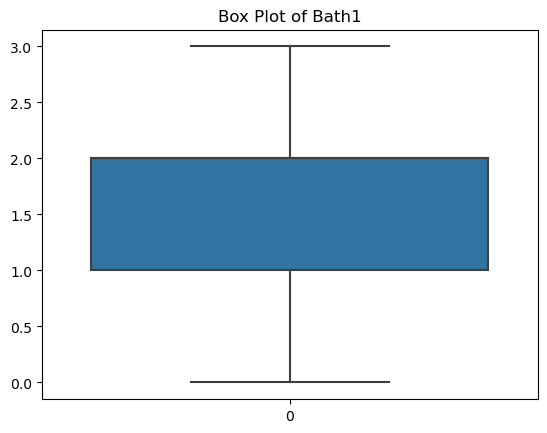

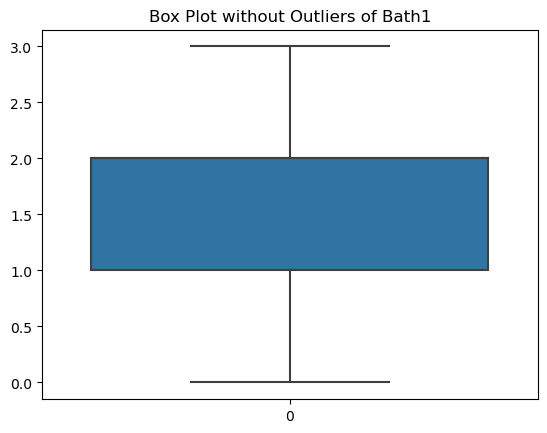

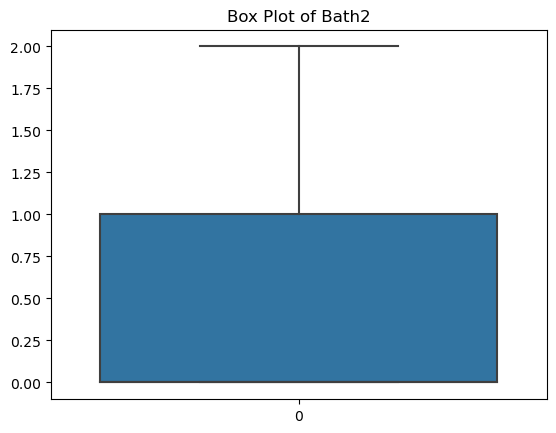

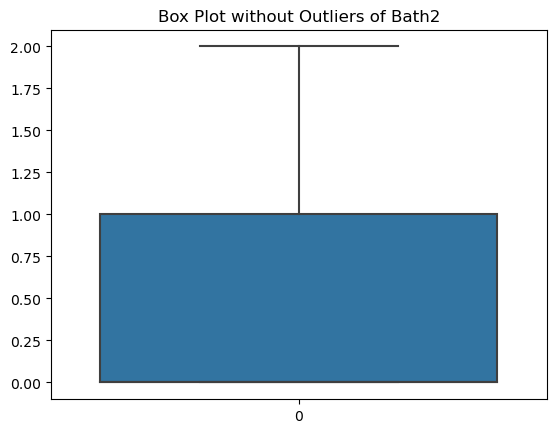

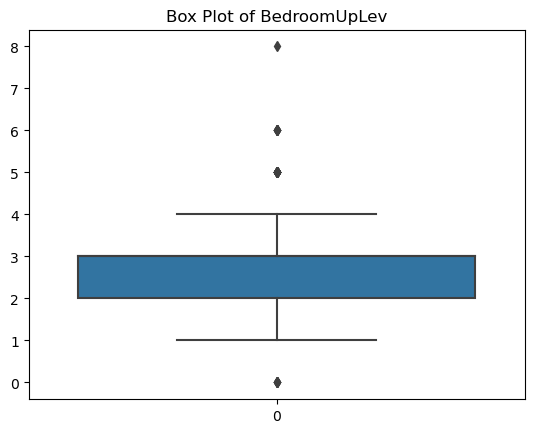

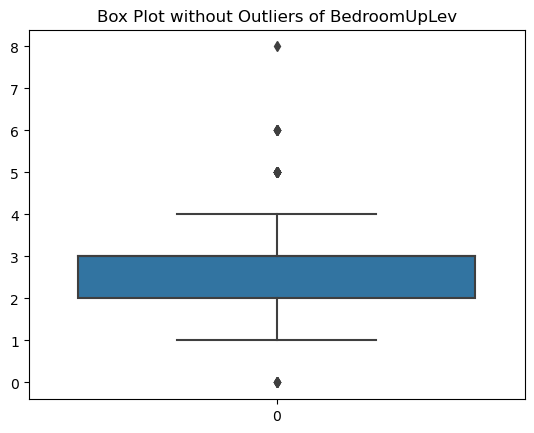

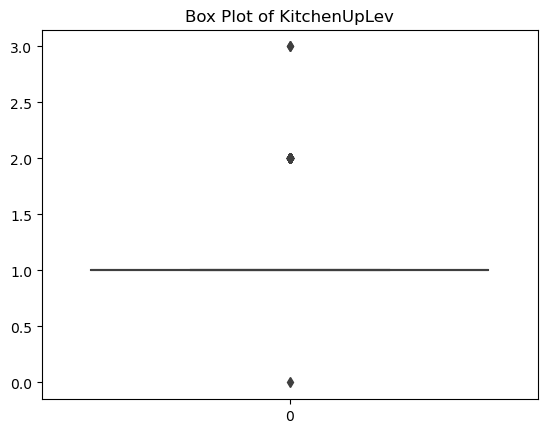

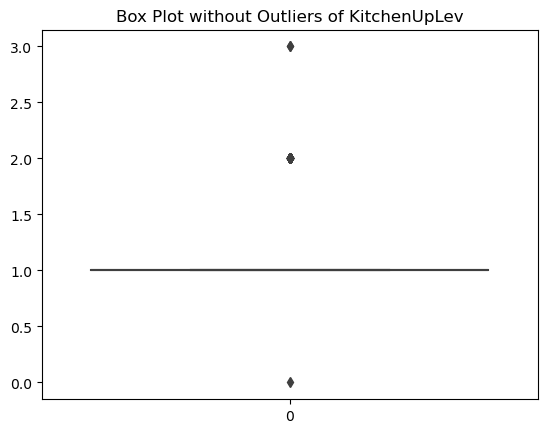

Skipping column 'KitchenQual' as it contains non-numeric data.


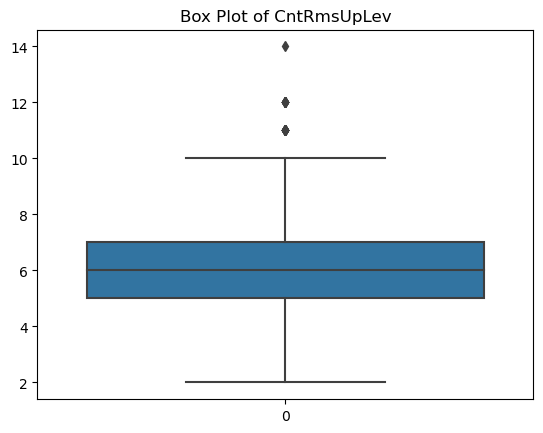

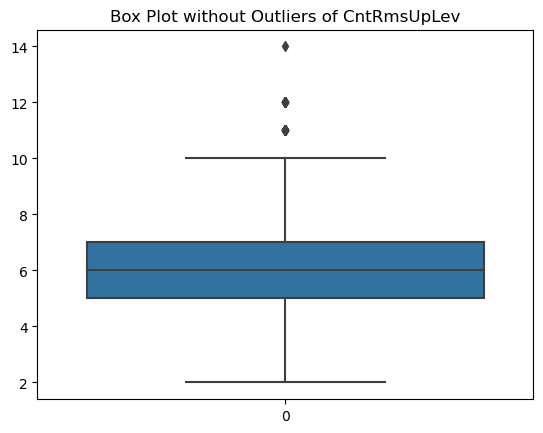

Skipping column 'Functional' as it contains non-numeric data.


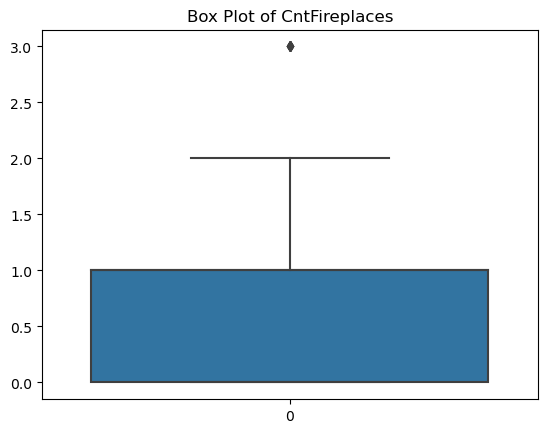

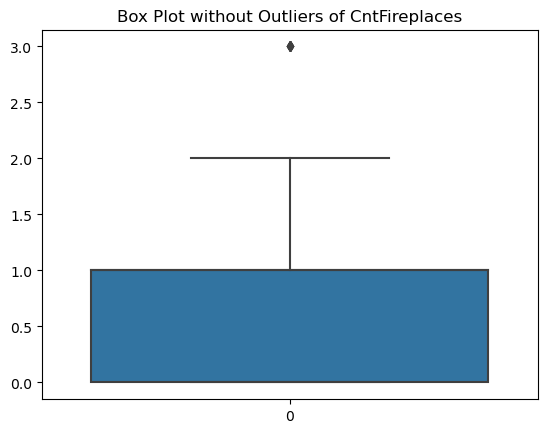

Skipping column 'BasementType' as it contains non-numeric data.


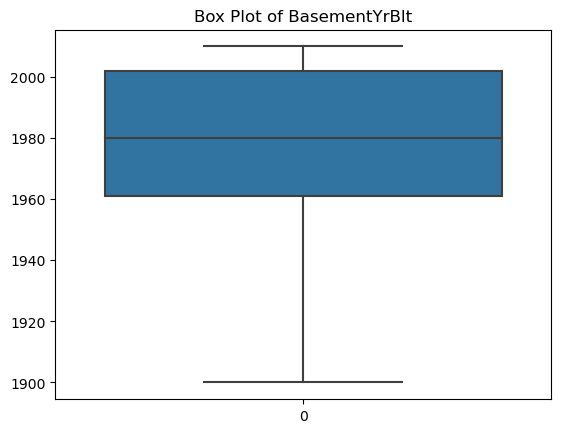

No data left after removing outliers in column 'BasementYrBlt'.
Skipping column 'BasementFinish' as it contains non-numeric data.


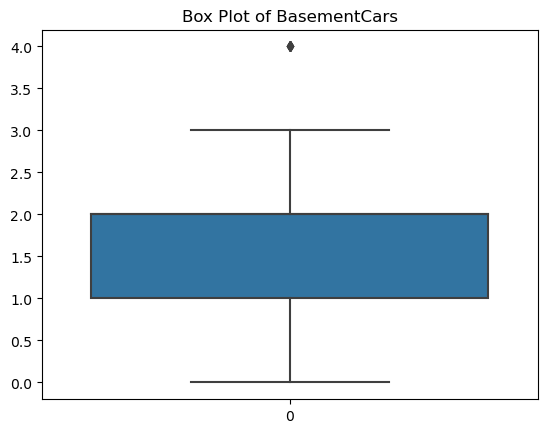

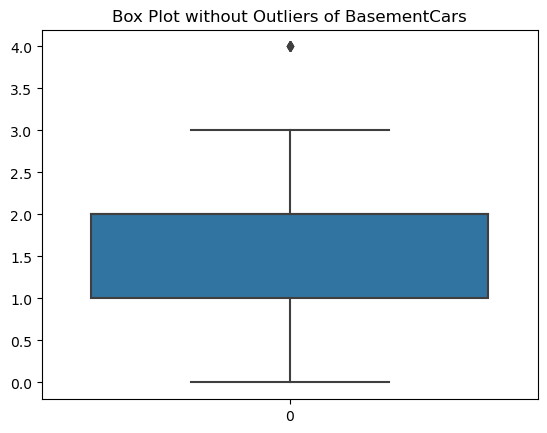

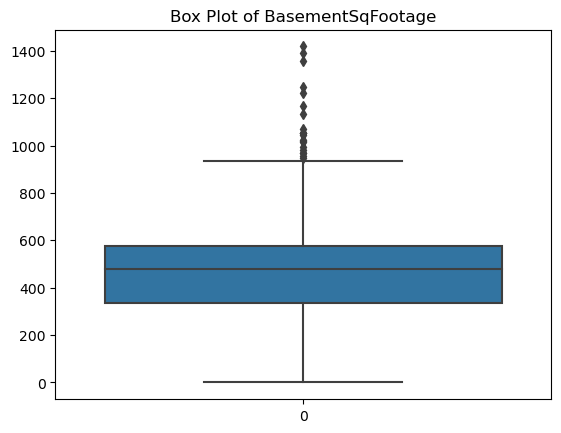

Skipping column 'BasementQual' as it contains non-numeric data.
Skipping column 'BasementCond' as it contains non-numeric data.
Skipping column 'PavedDrive' as it contains non-numeric data.


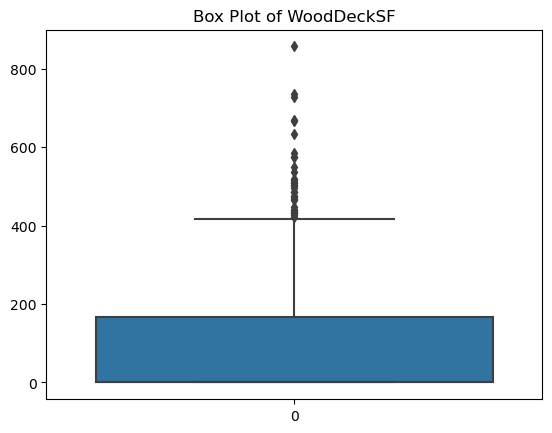

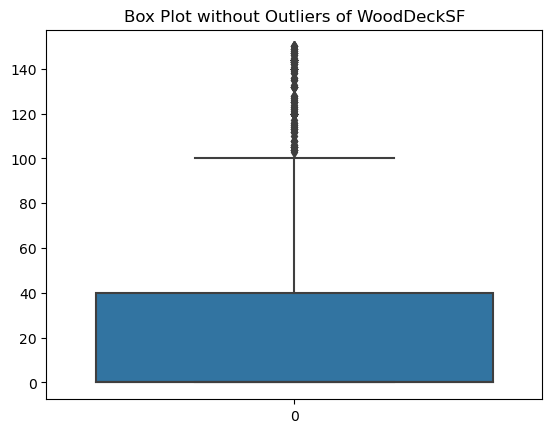

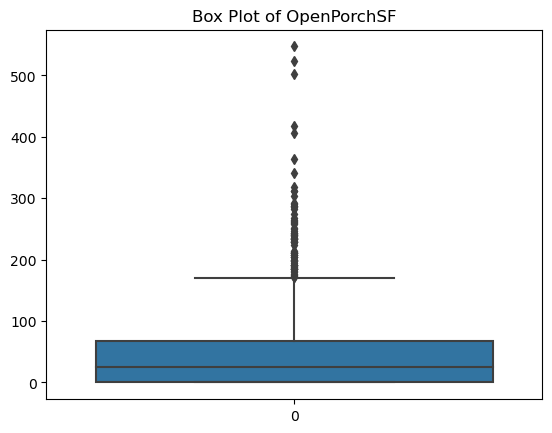

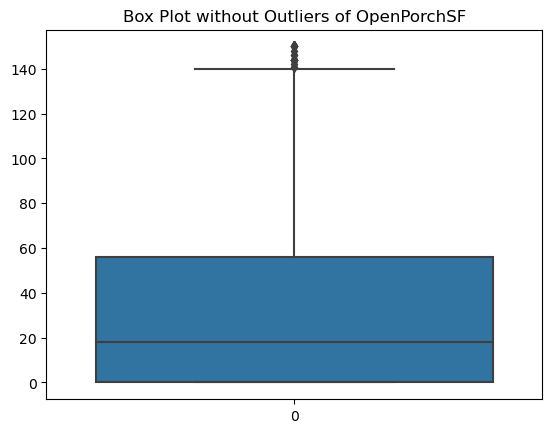

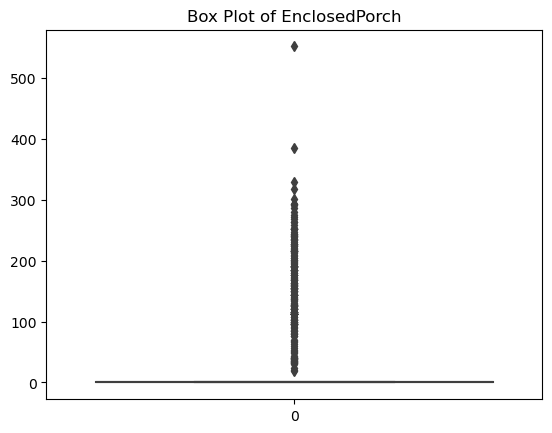

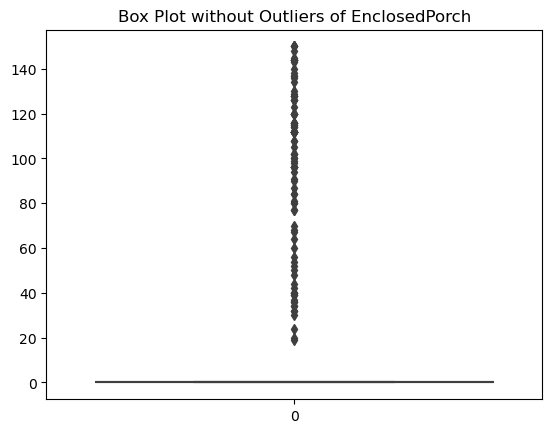

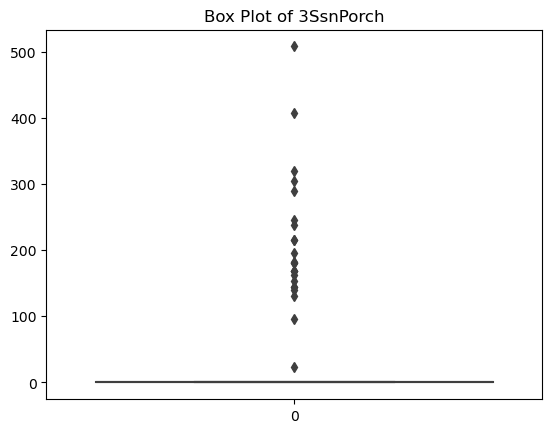

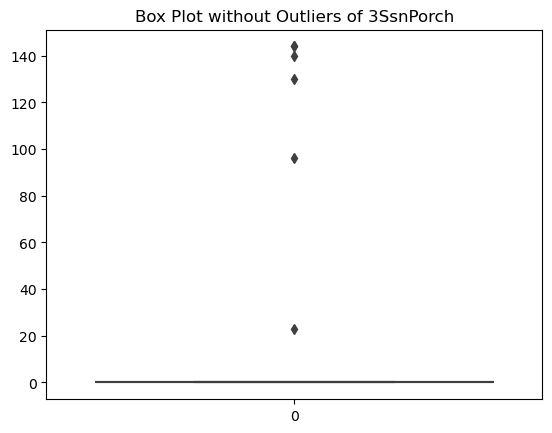

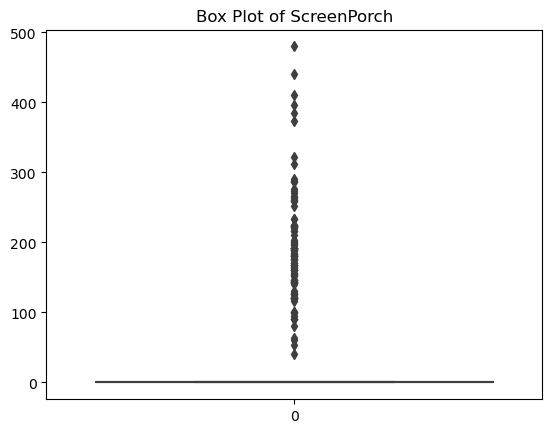

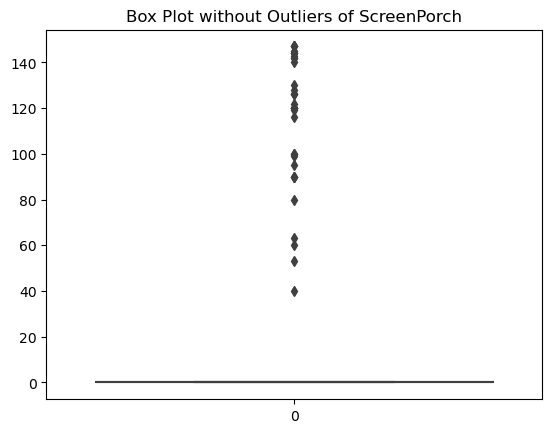

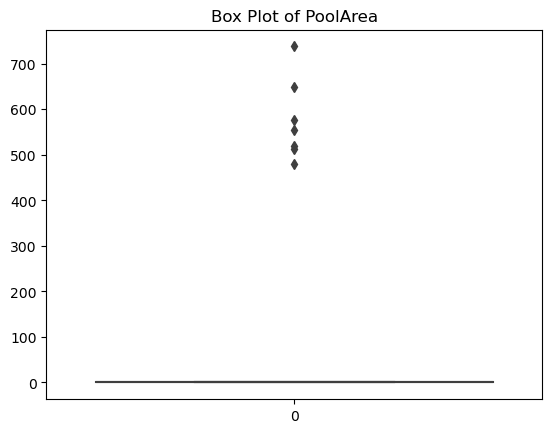

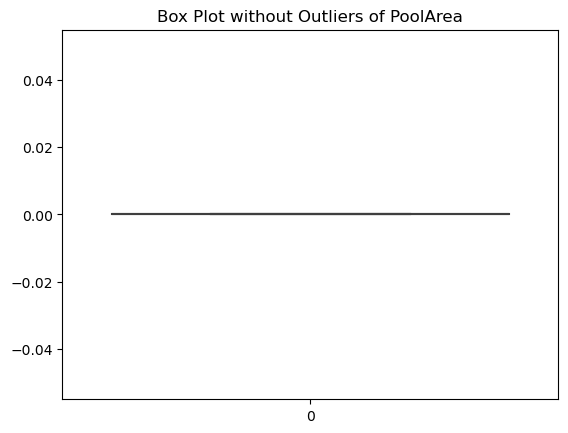

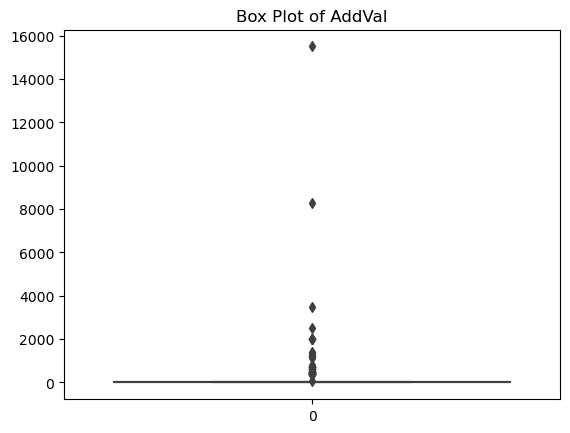

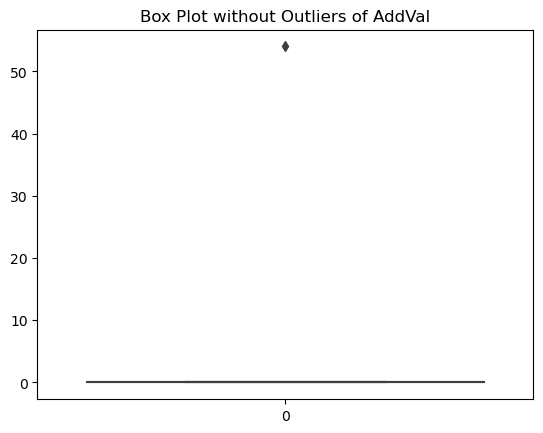

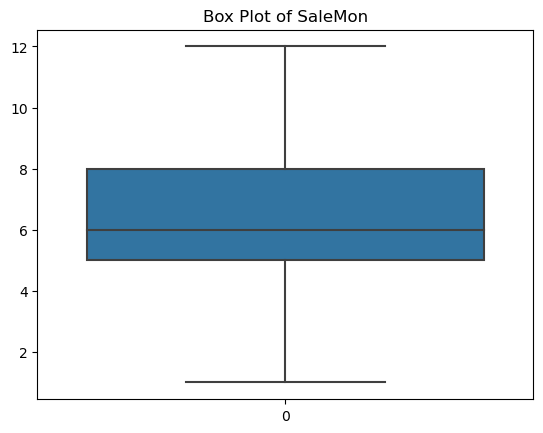

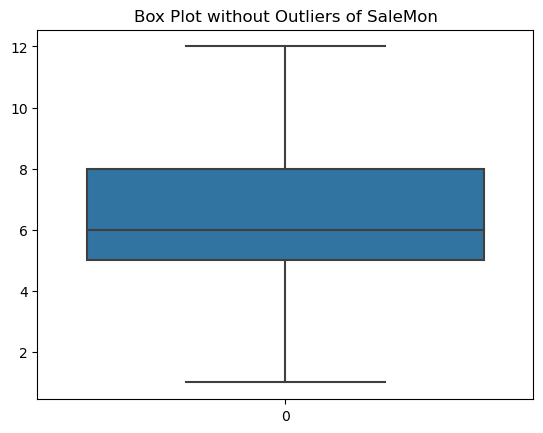

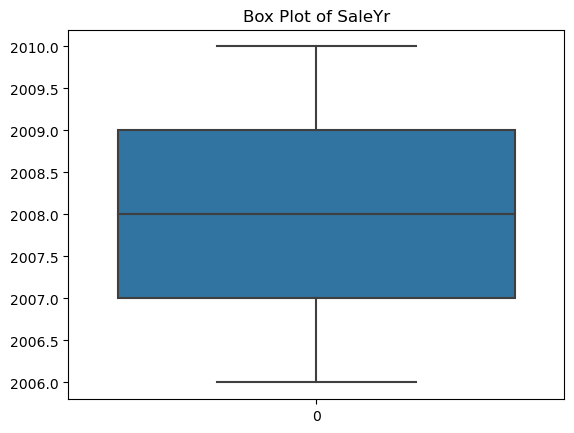

No data left after removing outliers in column 'SaleYr'.
Skipping column 'SaleType' as it contains non-numeric data.
Skipping column 'SaleCondn' as it contains non-numeric data.


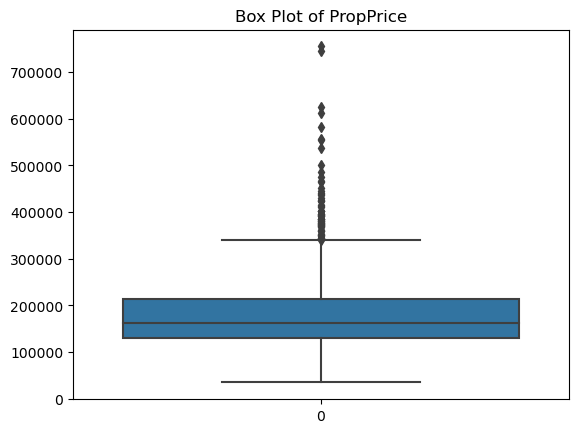

No data left after removing outliers in column 'PropPrice'.


In [26]:
def removal_box_plot(data, column, threshold):
    if data[column].dtype in [int, float]:
        sns.boxplot(data[column])
        plt.title(f'Box Plot of {column}')
        plt.show()
        
        # Remove outliers
        try:
            removed_outliers = data[data[column] <= threshold]
            
            # Check if there are any rows left
            if not removed_outliers.empty:
                sns.boxplot(removed_outliers[column])
                plt.title(f'Box Plot without Outliers of {column}')
                plt.show()
            else:
                print(f"No data left after removing outliers in column '{column}'.")
        except Exception as e:
            pass  # Do nothing if an error occurs
    else:
        print(f"Skipping column '{column}' as it contains non-numeric data.")

# Define the threshold value for outlier removal
threshold_value = 150

# Iterate over each column in the dataset
for column in data.columns:
    removal_box_plot(data, column, threshold_value)

# Exploratory Data Analysis (EDA)

In [27]:
data.to_csv('Cleaned_Data.csv', index=False)

In [28]:
data = pd.read_csv('Cleaned_Data.csv')
data

PropertyClass PropertyZone  PropertyFrontage  PropertySize Street  \
0                60           RL              65.0          8450   Pave   
1                20           RL              80.0          9600   Pave   
2                60           RL              68.0         11250   Pave   
3                70           RL              60.0          9550   Pave   
4                60           RL              84.0         14260   Pave   
...             ...          ...               ...           ...    ...   
1455             60           RL              62.0          7917   Pave   
1456             20           RL              85.0         13175   Pave   
1457             70           RL              66.0          9042   Pave   
1458             20           RL              68.0          9717   Pave   
1459             20           RL              75.0          9937   Pave   

     PropertyShape Elevation Amenities Orientation Grade  ... EnclosedPorch  \
0              Reg       Lvl    AllPub      Inside   Gtl  ...             0   
1              Reg       Lvl    AllPub         FR2   Gtl  ...             0   
2              IR1       Lvl    AllPub      Inside   Gtl  ...             0   
3              IR1       Lvl    AllPub      Corner   Gtl  ...           272   
4              IR1       Lvl    AllPub         FR2   Gtl  ...             0   
...            ...       ...       ...         ...   ...  ...           ...   
1455           Reg       Lvl    AllPub      Inside   Gtl  ...             0   
1456           Reg       Lvl    AllPub      Inside   Gtl  ...             0   
1457           Reg       Lvl    AllPub      Inside   Gtl  ...             0   
1458           Reg       Lvl    AllPub      Inside   Gtl  ...           112   
1459           Reg       Lvl    AllPub      Inside   Gtl  ...             0   

     3SsnPorch ScreenPorch PoolArea AddVal  SaleMon  SaleYr  SaleType  \
0            0           0        0      0        2    2008        WD   
1            0           0        0      0        5    2007        WD   
2            0           0        0      0        9    2008        WD   
3            0           0        0      0        2    2006        WD   
4            0           0        0      0       12    2008        WD   
...        ...         ...      ...    ...      ...     ...       ...   
1455         0           0        0      0        8    2007        WD   
1456         0           0        0      0        2    2010        WD   
1457         0           0        0   2500        5    2010        WD   
1458         0           0        0      0        4    2010        WD   
1459         0           0        0      0        6    2008        WD   

      SaleCondn PropPrice  
0        Normal    208500  
1        Normal    181500  
2        Normal    223500  
3       Abnorml    140000  
4        Normal    250000  
...         ...       ...  
1455     Normal    175000  
1456     Normal    210000  
1457     Normal    266500  
1458     Normal    142125  
1459     Normal    147500  

[1460 rows x 74 columns]

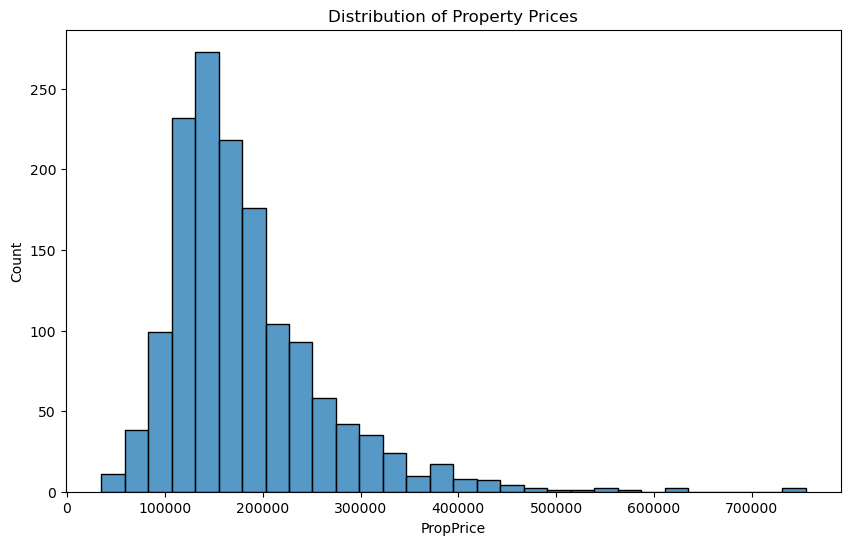

In [29]:
# Plot distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(data['PropPrice'], bins=30)
plt.title('Distribution of Property Prices')
plt.show()

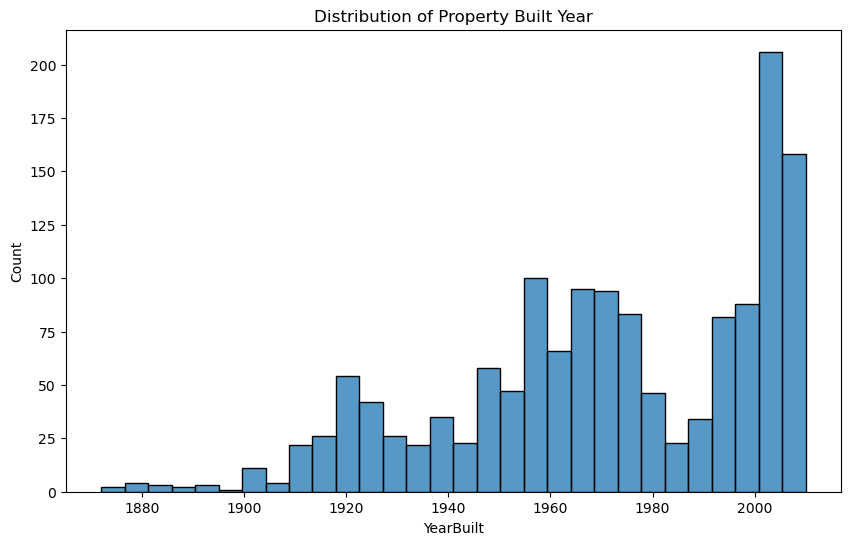

In [30]:
# Plot distribution of Property Built Year
plt.figure(figsize=(10, 6))
sns.histplot(data['YearBuilt'], bins=30)
plt.title('Distribution of Property Built Year')
plt.show()

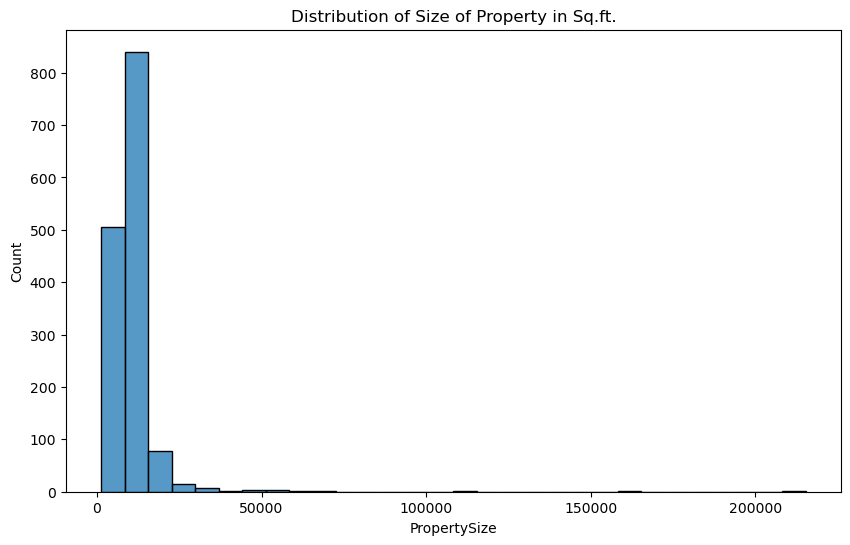

In [31]:
# Plot distribution of Property Built Year
plt.figure(figsize=(10, 6))
sns.histplot(data['PropertySize'], bins=30)
plt.title('Distribution of Size of Property in Sq.ft.')
plt.show()

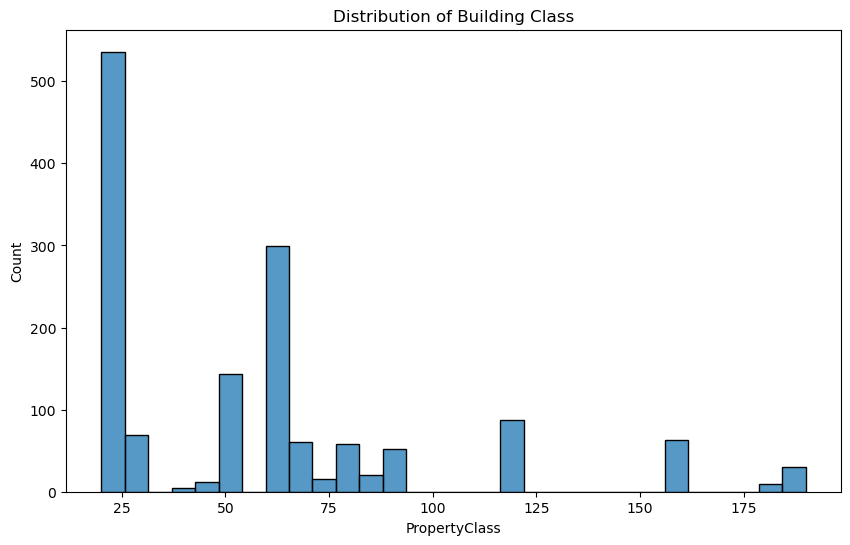

In [32]:
# Plot distribution of Property Built Year
plt.figure(figsize=(10, 6))
sns.histplot(data['PropertyClass'], bins=30)
plt.title('Distribution of Building Class')
plt.show()

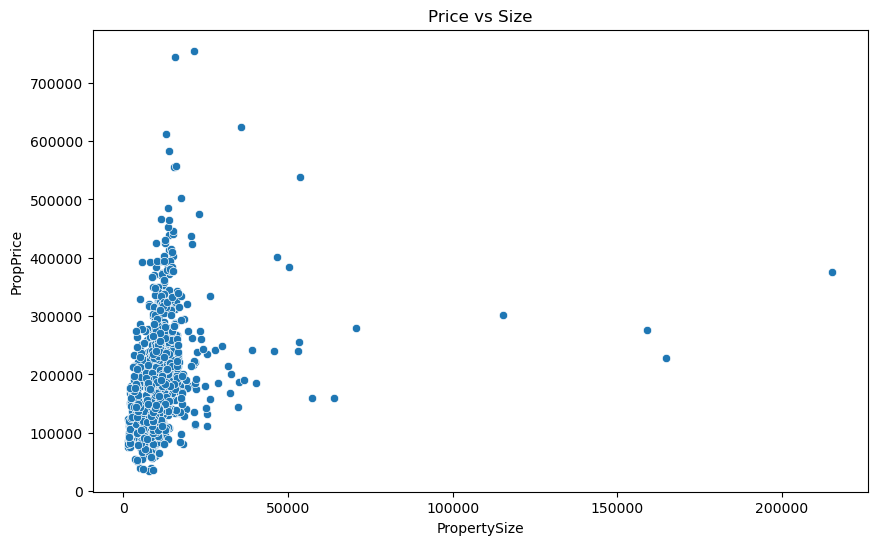

In [33]:
# Plot price vs size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PropertySize', y='PropPrice', data=data)
plt.title('Price vs Size')
plt.show()

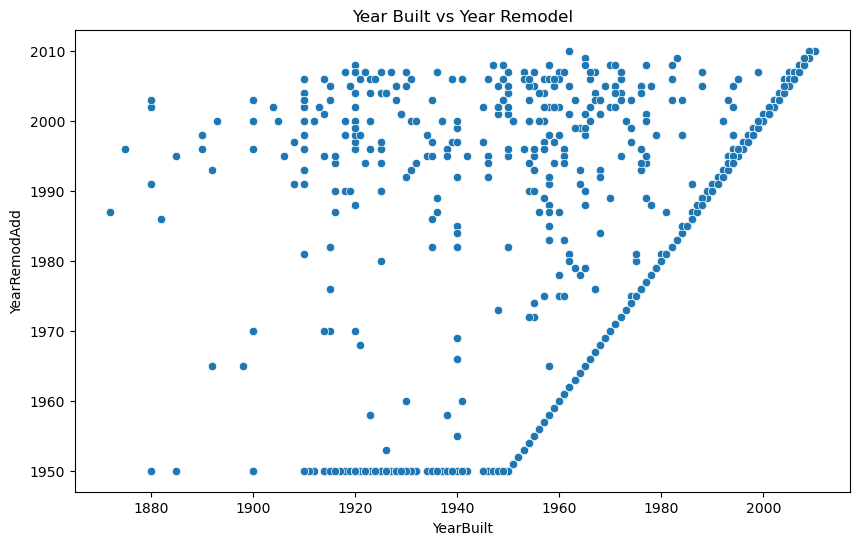

In [34]:
# Plot price vs size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearBuilt', y='YearRemodAdd', data=data)
plt.title('Year Built vs Year Remodel')
plt.show()

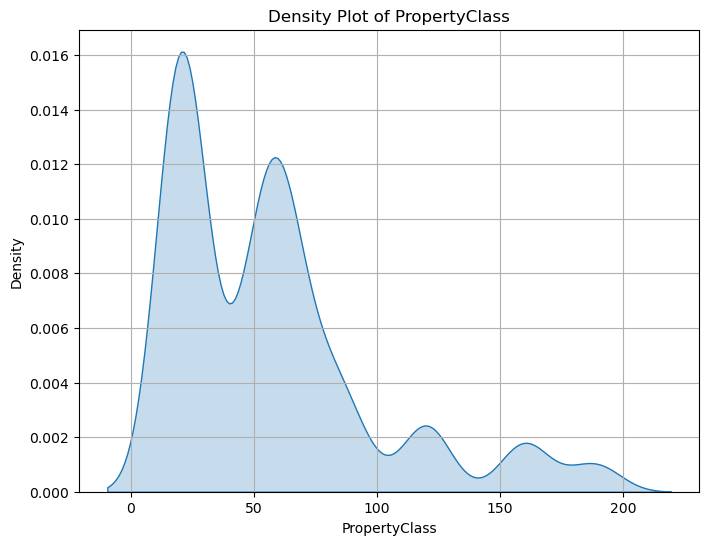

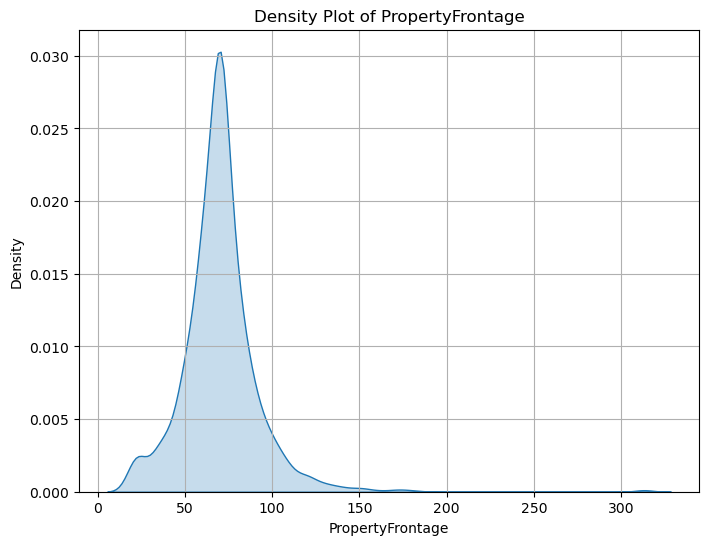

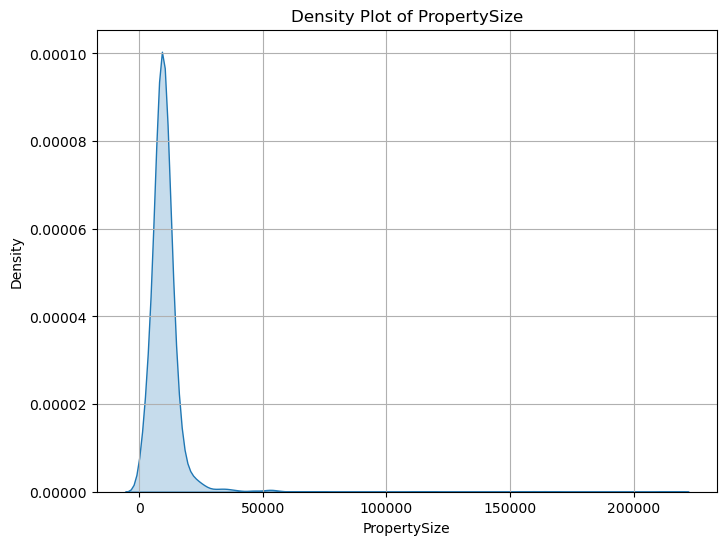

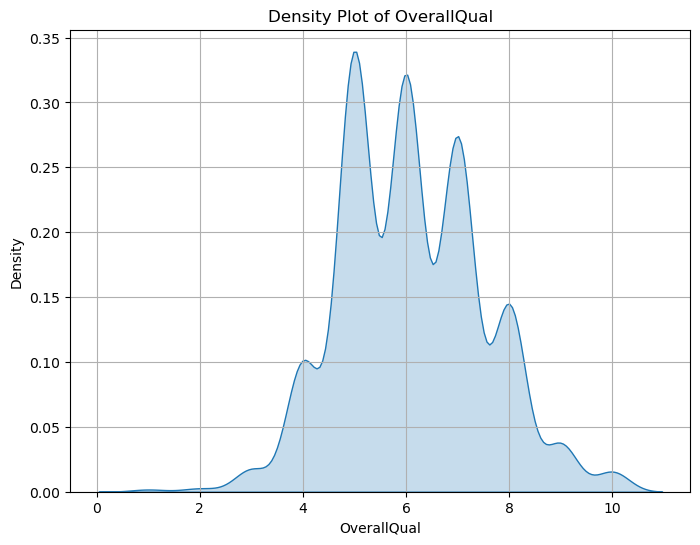

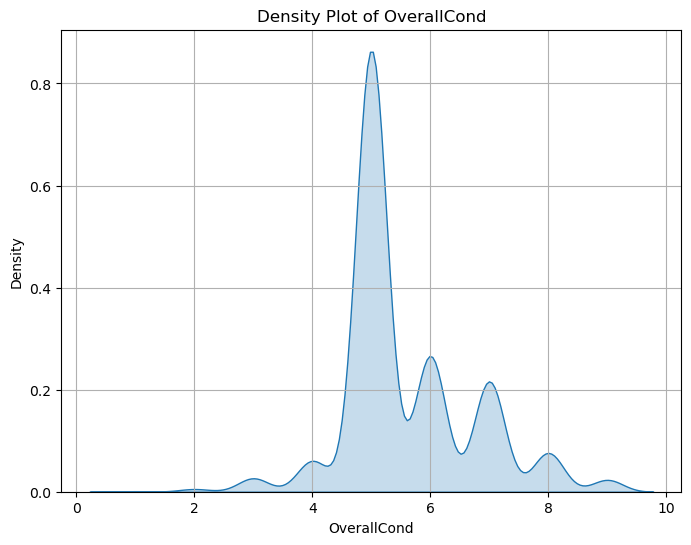

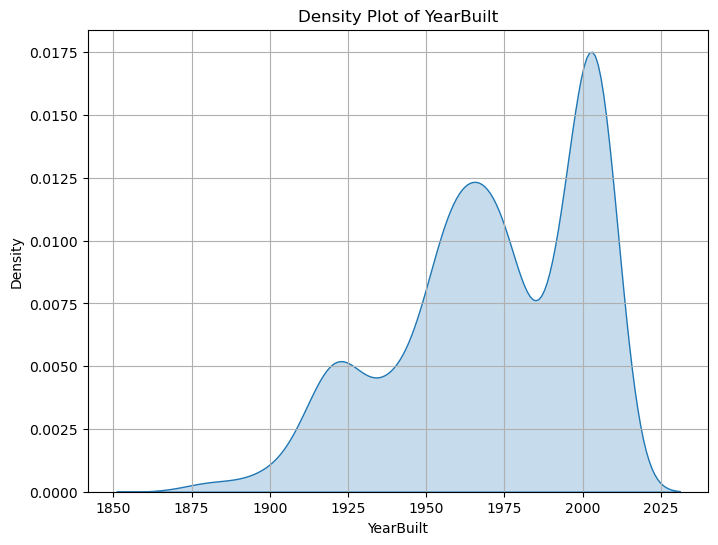

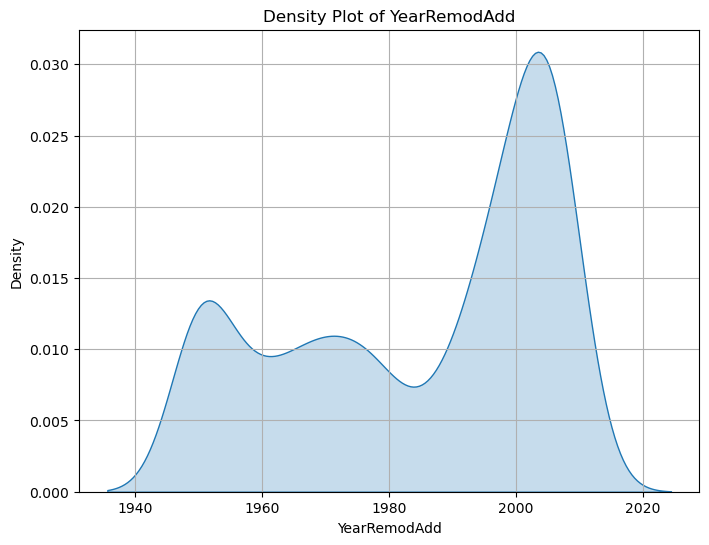

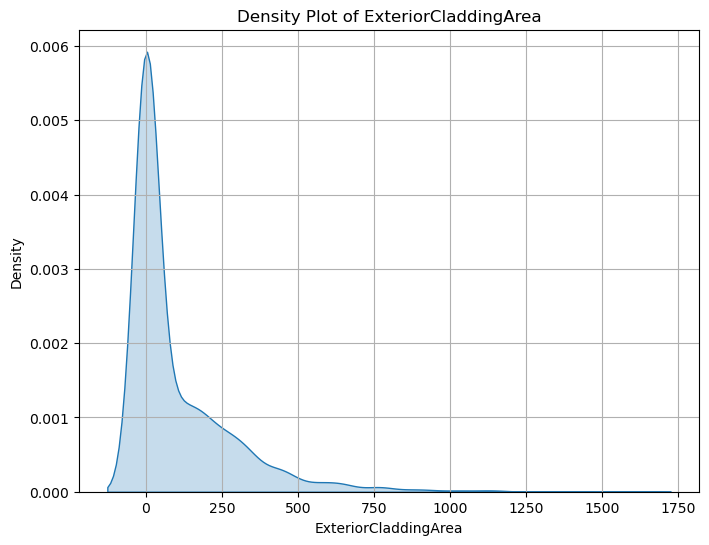

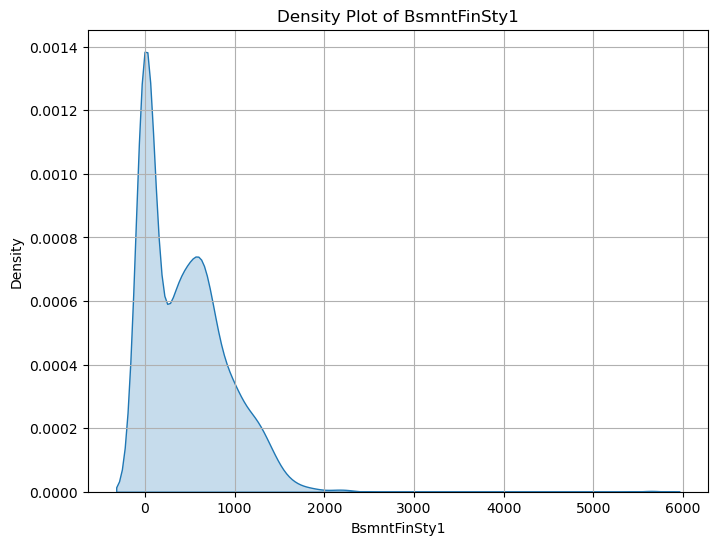

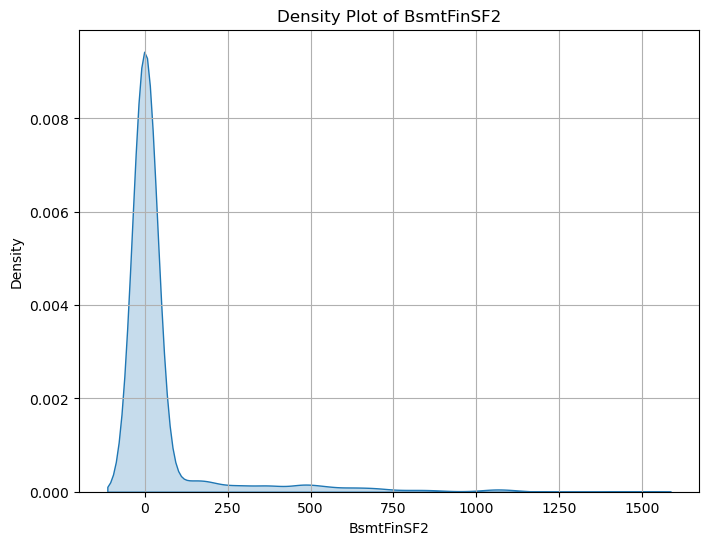

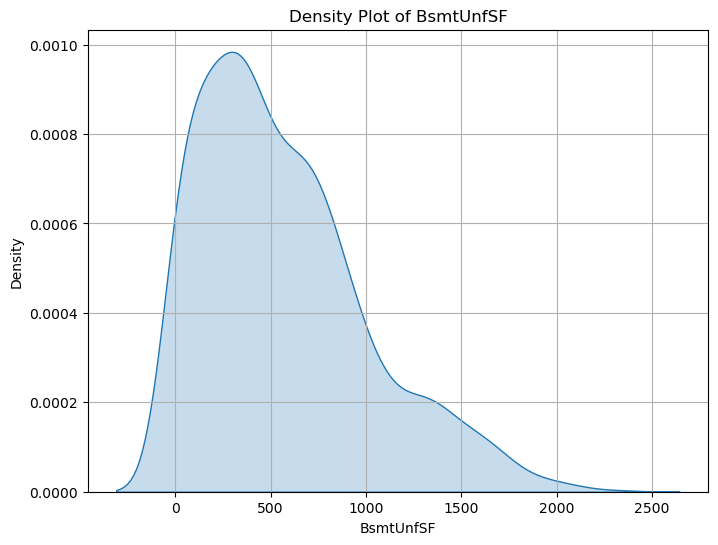

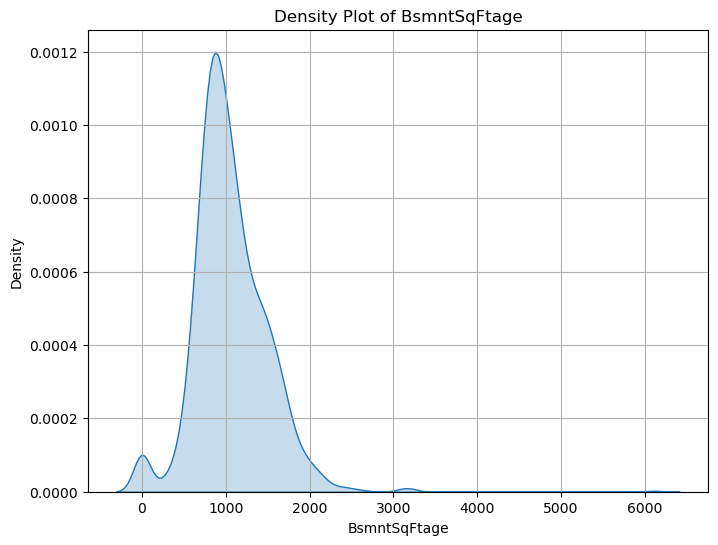

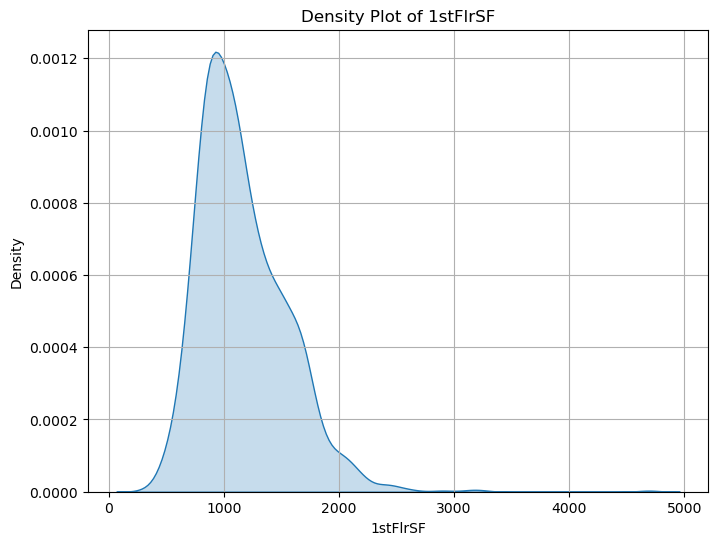

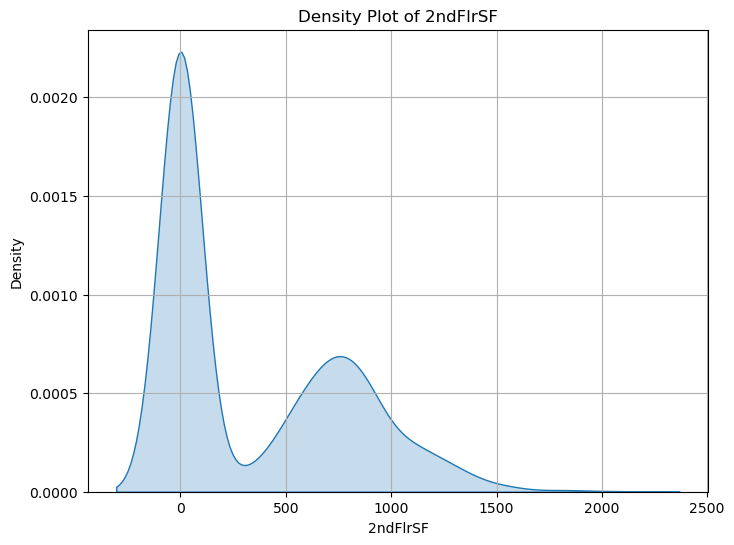

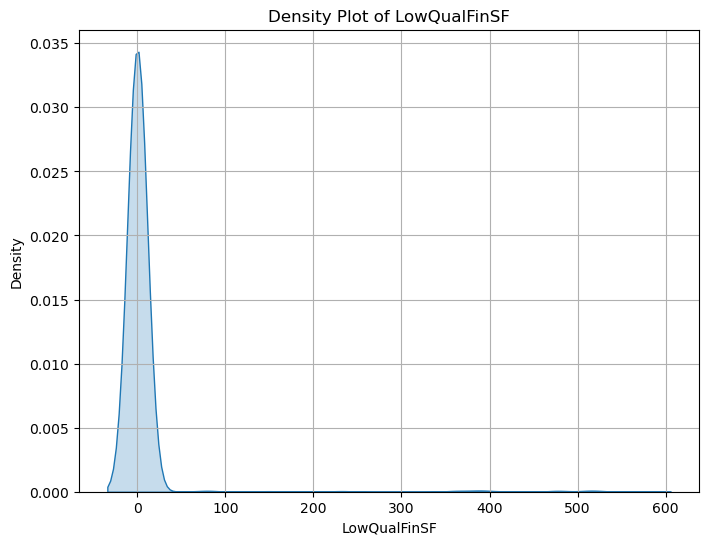

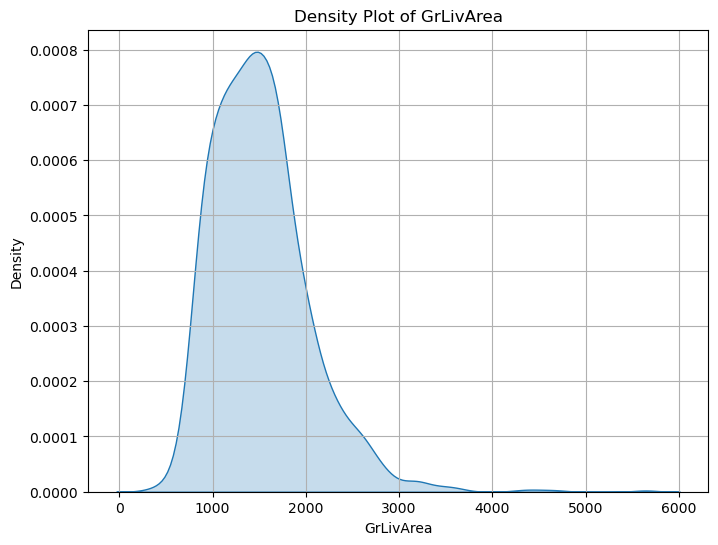

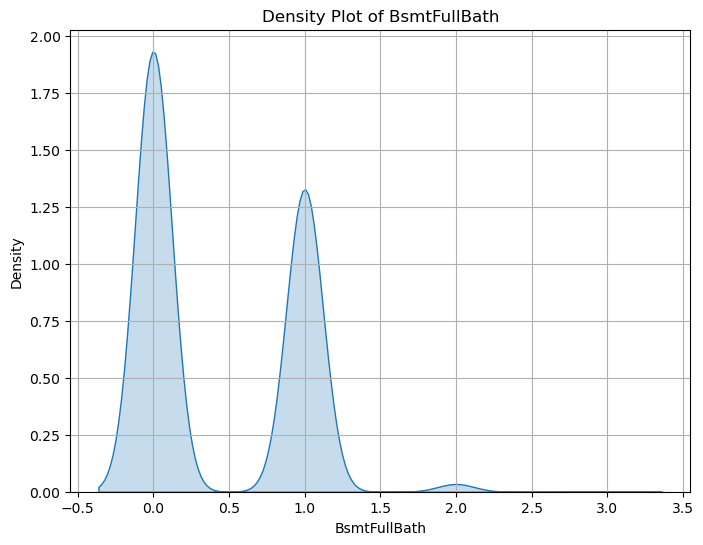

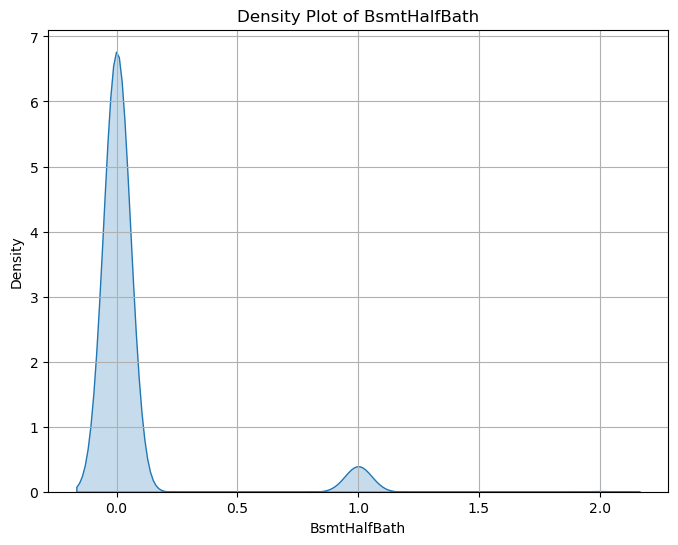

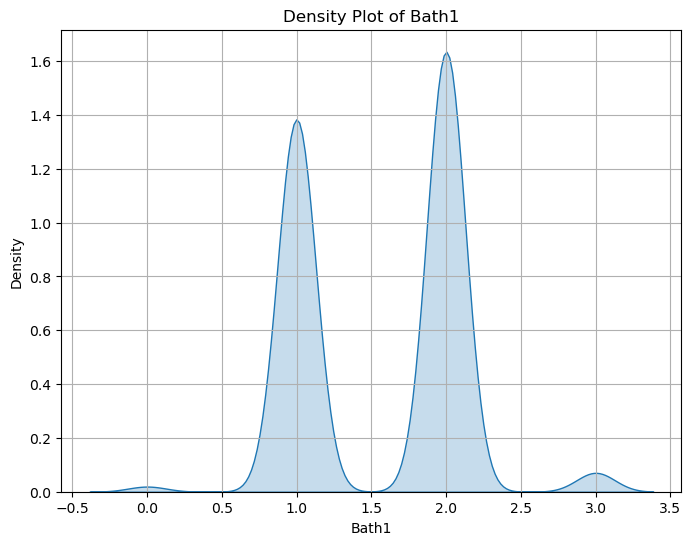

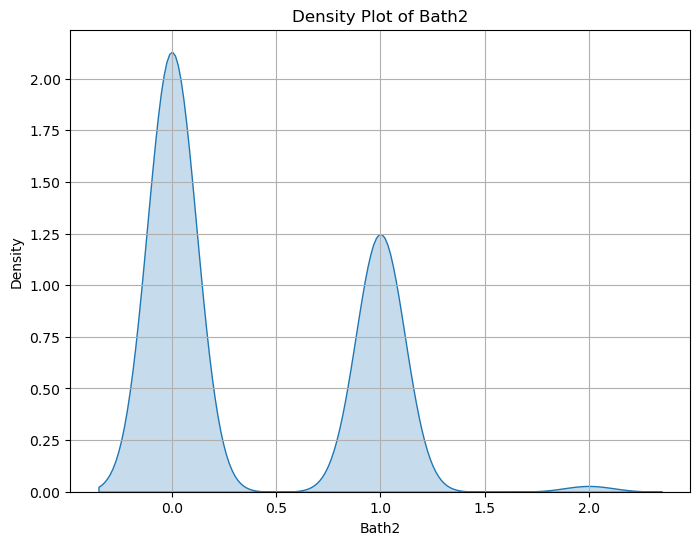

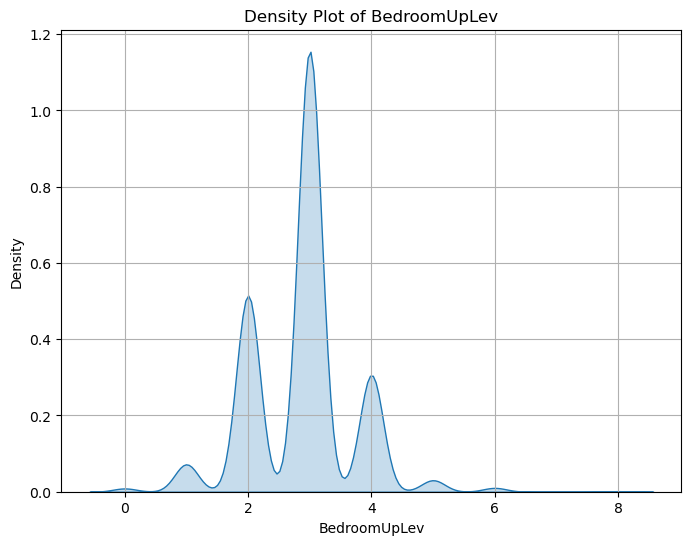

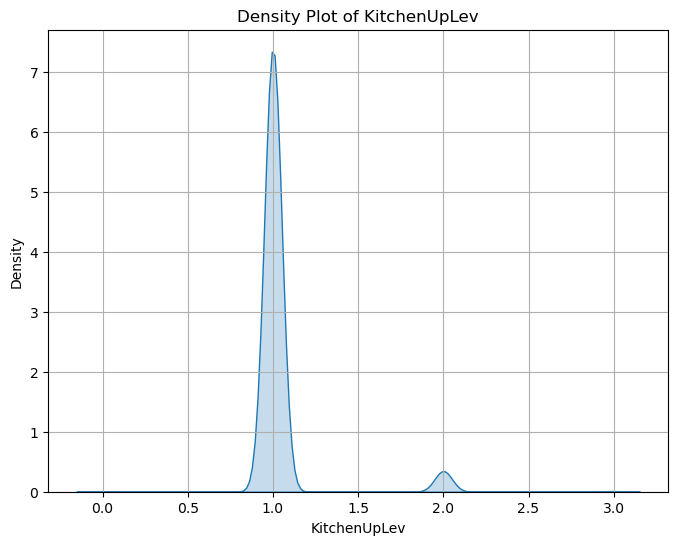

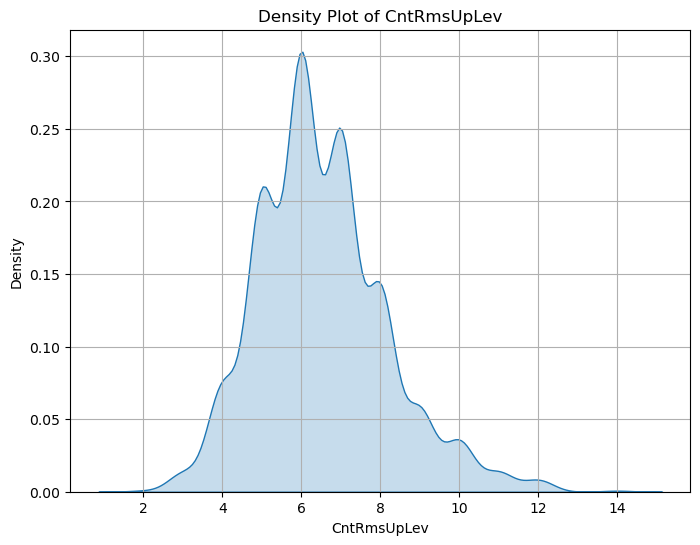

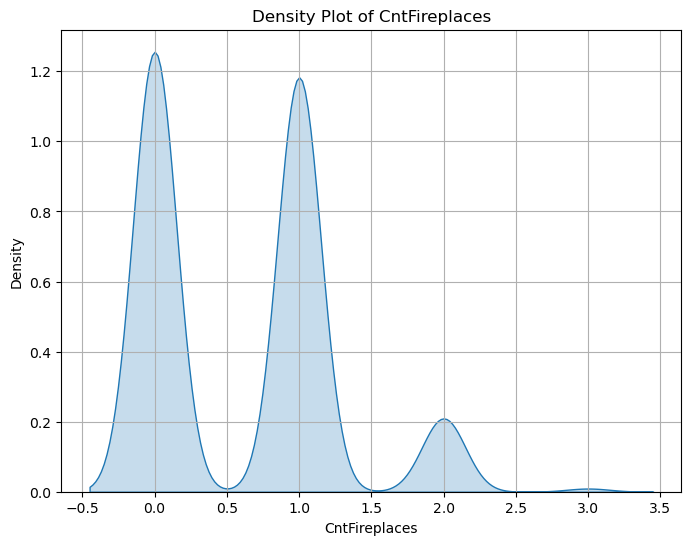

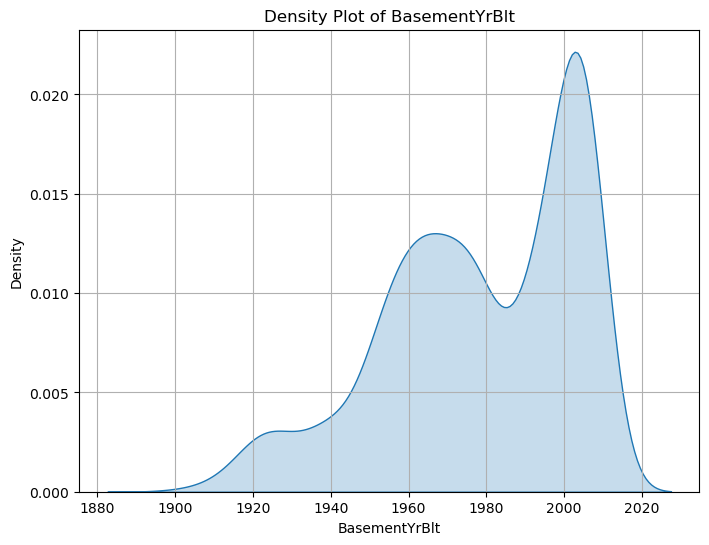

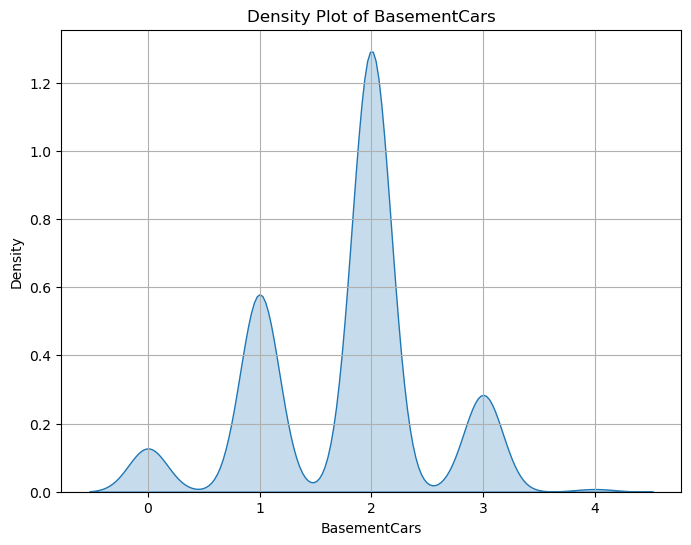

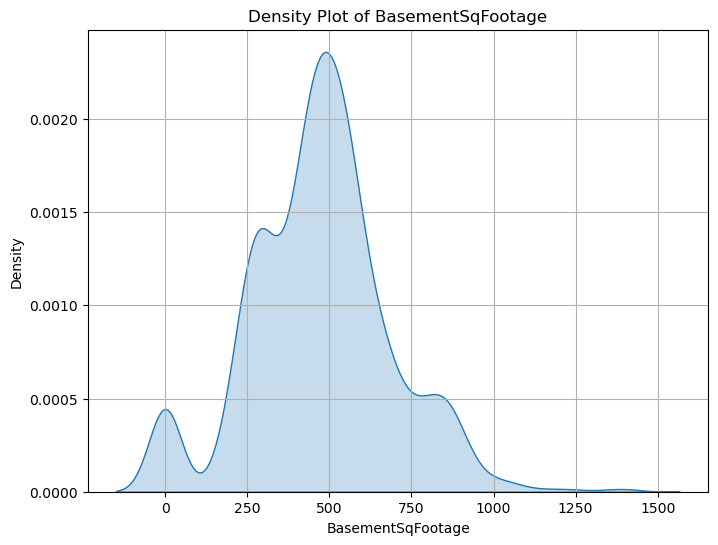

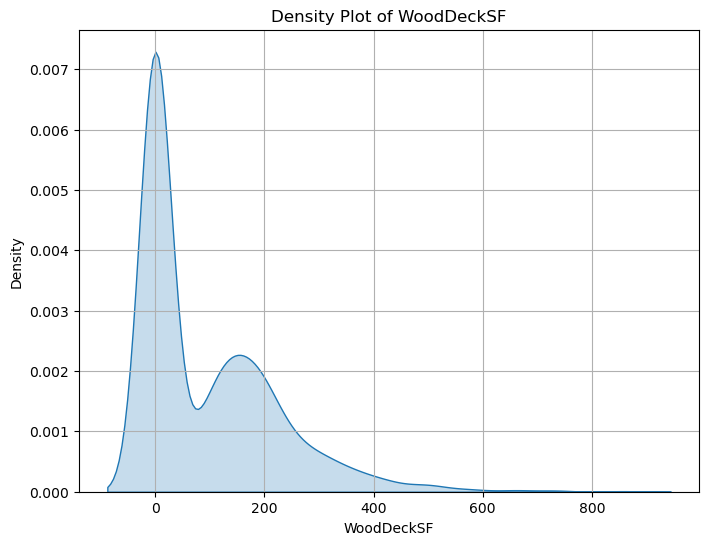

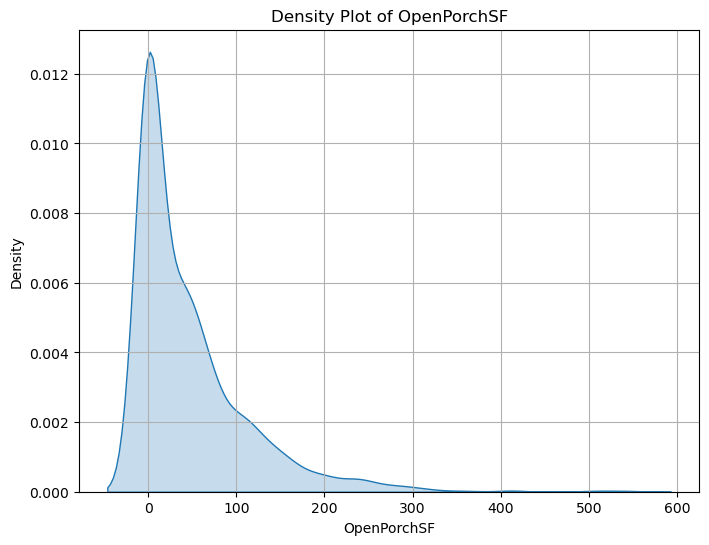

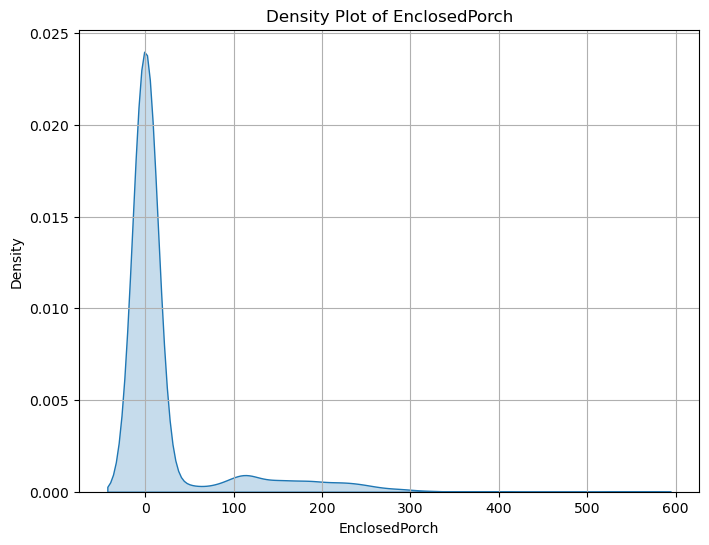

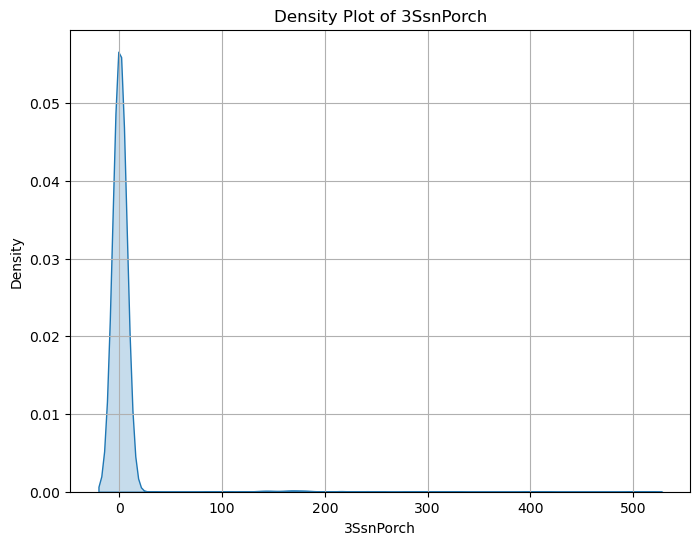

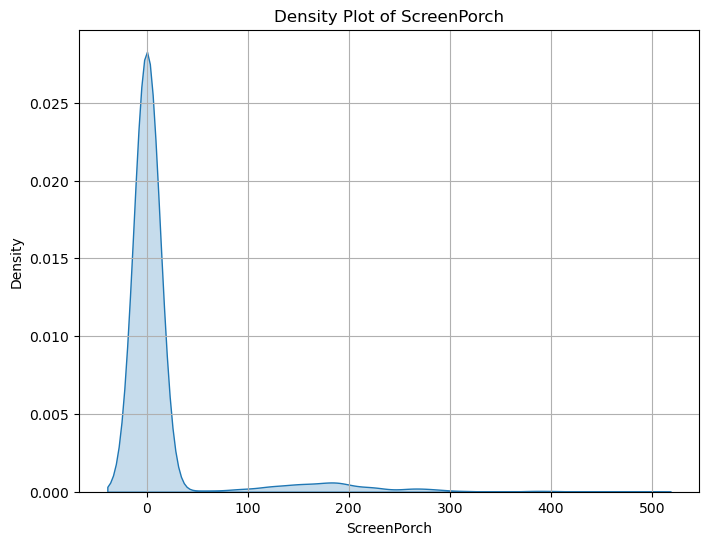

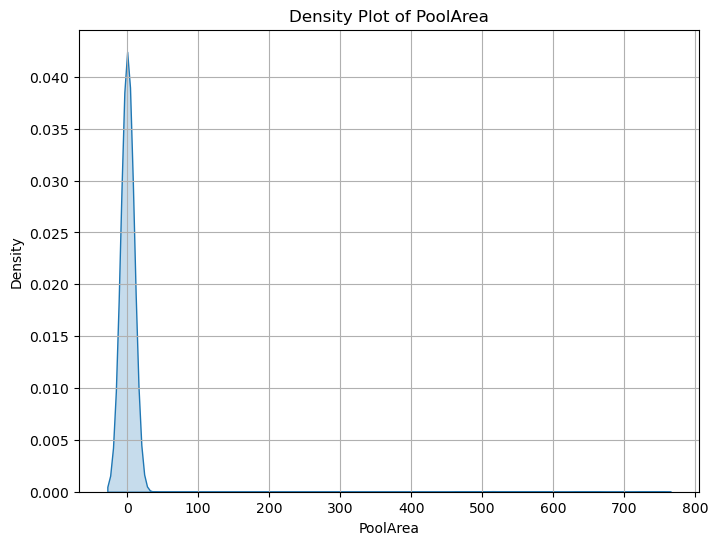

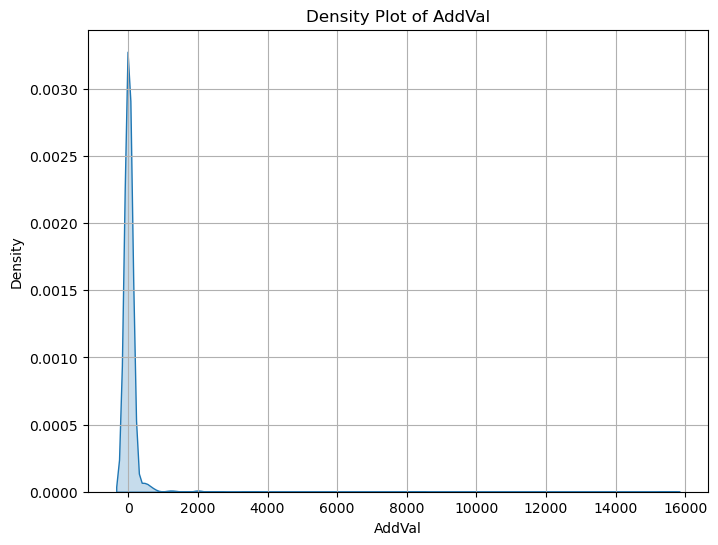

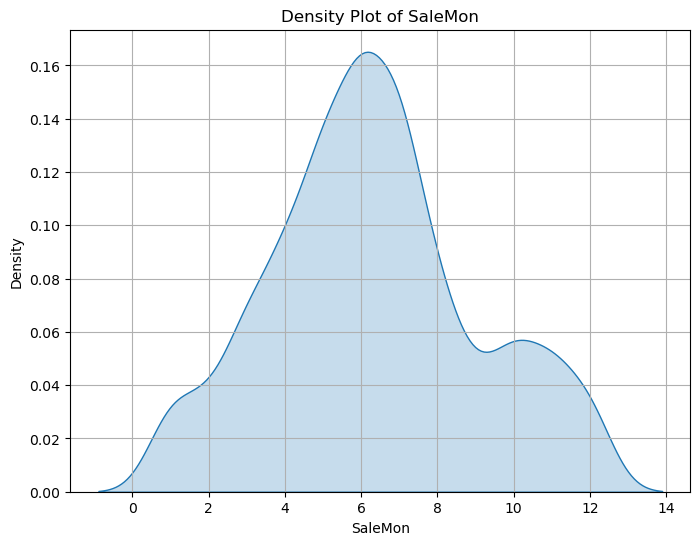

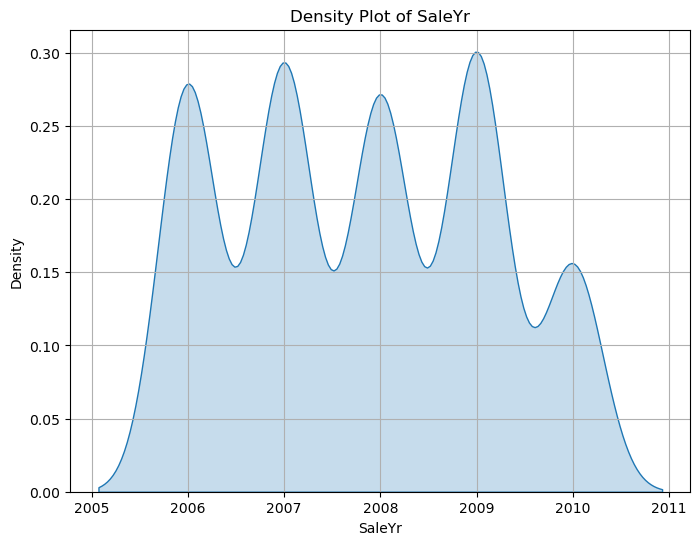

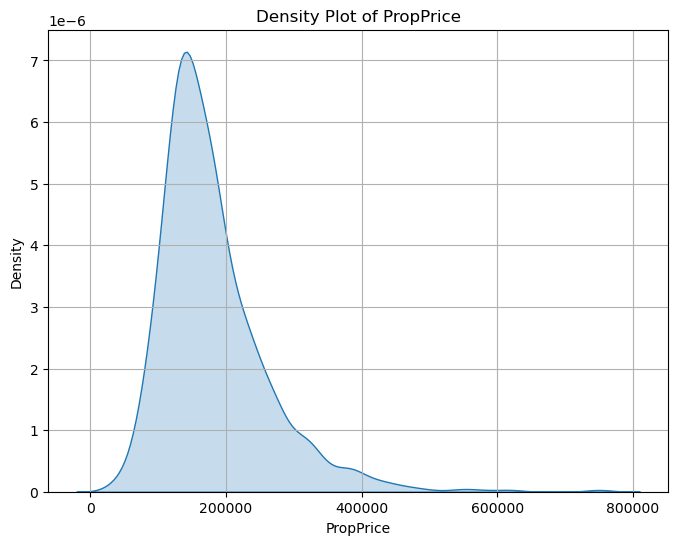

In [35]:
# Density Plot
numerical_columns = data.select_dtypes(include=['int64', 'float64'])

# Plotting density plots for each numerical column
for column in numerical_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(numerical_columns[column], shade=True)
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

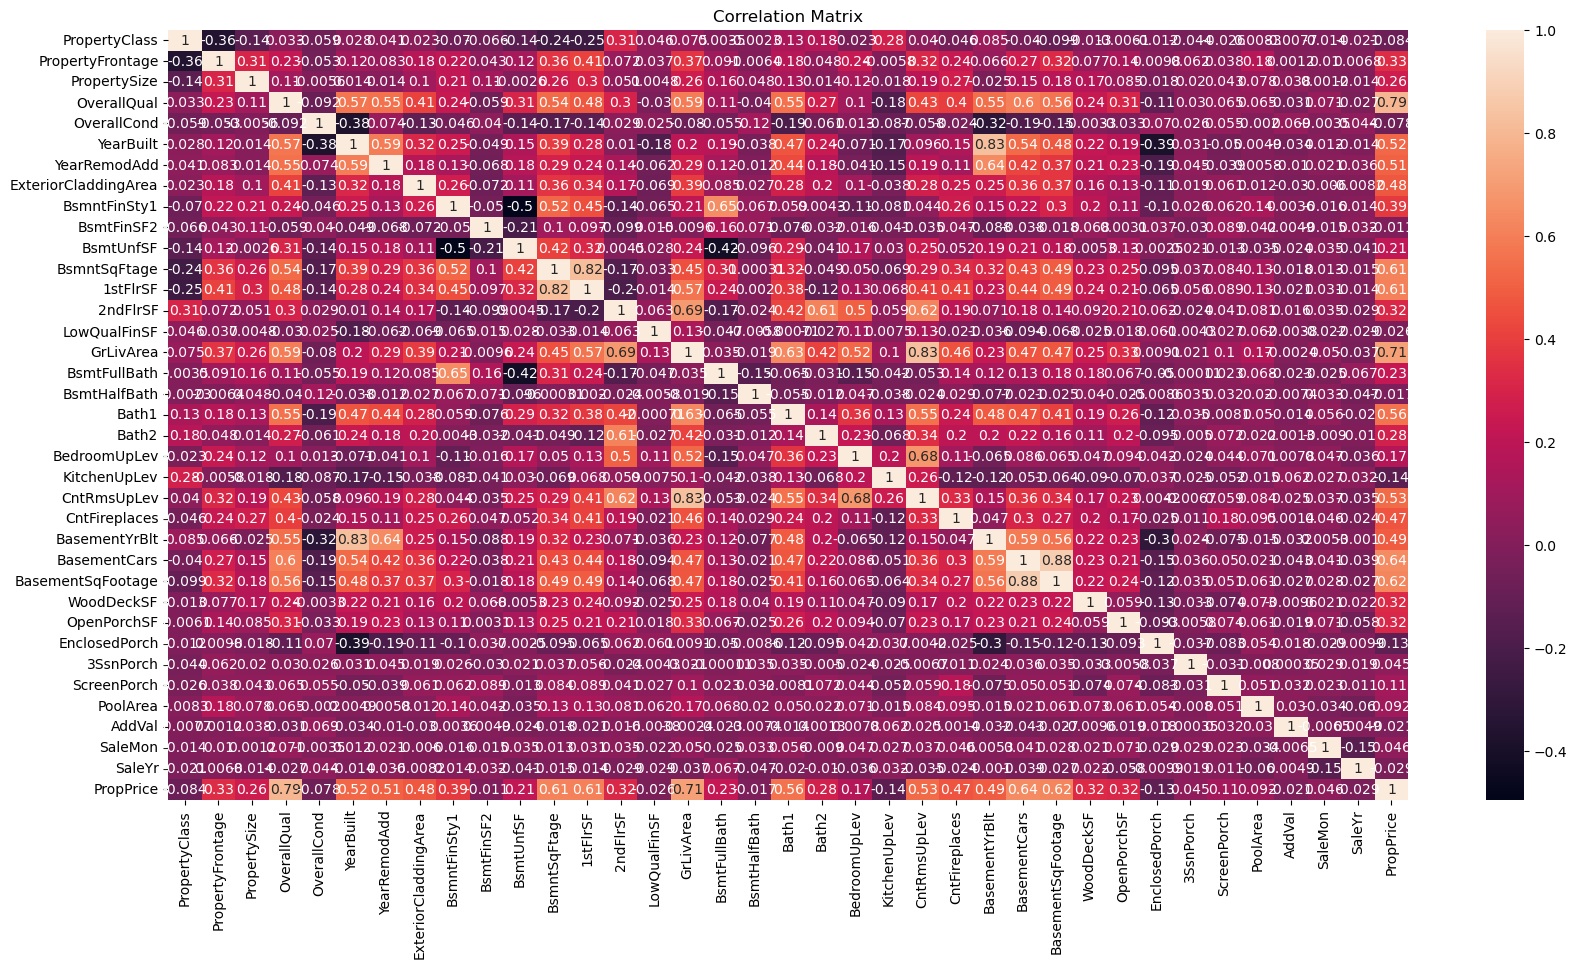

In [36]:
# Correlation matrix
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering

In [37]:
data = pd.read_csv('Cleaned_Data.csv')
data.head()

PropertyClass PropertyZone  PropertyFrontage  PropertySize Street  \
0             60           RL              65.0          8450   Pave   
1             20           RL              80.0          9600   Pave   
2             60           RL              68.0         11250   Pave   
3             70           RL              60.0          9550   Pave   
4             60           RL              84.0         14260   Pave   

  PropertyShape Elevation Amenities Orientation Grade  ... EnclosedPorch  \
0           Reg       Lvl    AllPub      Inside   Gtl  ...             0   
1           Reg       Lvl    AllPub         FR2   Gtl  ...             0   
2           IR1       Lvl    AllPub      Inside   Gtl  ...             0   
3           IR1       Lvl    AllPub      Corner   Gtl  ...           272   
4           IR1       Lvl    AllPub         FR2   Gtl  ...             0   

  3SsnPorch ScreenPorch PoolArea AddVal  SaleMon  SaleYr  SaleType  SaleCondn  \
0         0           0        0      0        2    2008        WD     Normal   
1         0           0        0      0        5    2007        WD     Normal   
2         0           0        0      0        9    2008        WD     Normal   
3         0           0        0      0        2    2006        WD    Abnorml   
4         0           0        0      0       12    2008        WD     Normal   

  PropPrice  
0    208500  
1    181500  
2    223500  
3    140000  
4    250000  

[5 rows x 74 columns]

In [38]:
# Creating new features
data['price_per_sqft'] = data['PropPrice'] / data['PropertySize']
data['price_per_sqft']

0       24.674556
1       18.906250
2       19.866667
3       14.659686
4       17.531557
          ...    
1455    22.104332
1456    15.939279
1457    29.473568
1458    14.626428
1459    14.843514
Name: price_per_sqft, Length: 1460, dtype: float64

In [39]:
data['TotalBathrooms'] = (data['Bath1'] + (data['Bath2']) +
                        data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath']))
data['TotalBathrooms']

0       4.0
1       2.5
2       4.0
3       2.0
4       4.0
       ... 
1455    3.0
1456    3.0
1457    2.0
1458    2.0
1459    3.0
Name: TotalBathrooms, Length: 1460, dtype: float64

In [40]:
data['Has2ndFloor'] = (data['2ndFlrSF'] > 0).astype(int)
data['Has2ndFloor']

0       1
1       0
2       1
3       1
4       1
       ..
1455    1
1456    0
1457    1
1458    0
1459    0
Name: Has2ndFloor, Length: 1460, dtype: int64

In [41]:
data['TotalSquareFeet'] = data['BsmntSqFtage'] + data['1stFlrSF'] + data['2ndFlrSF']
data['TotalSquareFeet']

0       2566
1       2524
2       2706
3       2473
4       3343
        ... 
1455    2600
1456    3615
1457    3492
1458    2156
1459    2512
Name: TotalSquareFeet, Length: 1460, dtype: int64

In [42]:
data['HouseAge'] = data['SaleYr'] - data['YearBuilt']
data['HouseAge']

0        5
1       31
2        7
3       91
4        8
        ..
1455     8
1456    32
1457    69
1458    60
1459    43
Name: HouseAge, Length: 1460, dtype: int64

In [43]:
data['YearsSinceRemodel'] = data['SaleYr'] - data['YearRemodAdd']
data['YearsSinceRemodel']

0        5
1       31
2        6
3       36
4        8
        ..
1455     7
1456    22
1457     4
1458    14
1459    43
Name: YearsSinceRemodel, Length: 1460, dtype: int64

In [44]:
data = pd.get_dummies(data, columns=categorical_columns)
data

PropertyClass  PropertyFrontage  PropertySize  OverallQual  OverallCond  \
0                60              65.0          8450            7            5   
1                20              80.0          9600            6            8   
2                60              68.0         11250            7            5   
3                70              60.0          9550            7            5   
4                60              84.0         14260            8            5   
...             ...               ...           ...          ...          ...   
1455             60              62.0          7917            6            5   
1456             20              85.0         13175            6            6   
1457             70              66.0          9042            7            9   
1458             20              68.0          9717            5            6   
1459             20              75.0          9937            5            6   

      YearBuilt  YearRemodAdd  ExteriorCladdingArea  BsmntFinSty1  BsmtFinSF2  \
0          2003          2003                 196.0           706           0   
1          1976          1976                   0.0           978           0   
2          2001          2002                 162.0           486           0   
3          1915          1970                   0.0           216           0   
4          2000          2000                 350.0           655           0   
...         ...           ...                   ...           ...         ...   
1455       1999          2000                   0.0             0           0   
1456       1978          1988                 119.0           790         163   
1457       1941          2006                   0.0           275           0   
1458       1950          1996                   0.0            49        1029   
1459       1965          1965                   0.0           830         290   

      ...  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0     ...           False         False         False         True   
1     ...           False         False         False         True   
2     ...           False         False         False         True   
3     ...           False         False         False         True   
4     ...           False         False         False         True   
...   ...             ...           ...           ...          ...   
1455  ...           False         False         False         True   
1456  ...           False         False         False         True   
1457  ...           False         False         False         True   
1458  ...           False         False         False         True   
1459  ...           False         False         False         True   

      SaleCondn_Abnorml  SaleCondn_AdjLand  SaleCondn_Alloca  \
0                 False              False             False   
1                 False              False             False   
2                 False              False             False   
3                  True              False             False   
4                 False              False             False   
...                 ...                ...               ...   
1455              False              False             False   
1456              False              False             False   
1457              False              False             False   
1458              False              False             False   
1459              False              False             False   

      SaleCondn_Family  SaleCondn_Normal  SaleCondn_Partial  
0                False              True              False  
1                False              True              False  
2                False              True              False  
3                False             False              False  
4                False              True              False  
...                ...               ...                ...  
1455            

#  Model Selection

In [45]:
data.to_csv('Engineered_Data.csv', index=False)

In [46]:
data = pd.read_csv('Engineered_Data.csv')
data

PropertyClass  PropertyFrontage  PropertySize  OverallQual  OverallCond  \
0                60              65.0          8450            7            5   
1                20              80.0          9600            6            8   
2                60              68.0         11250            7            5   
3                70              60.0          9550            7            5   
4                60              84.0         14260            8            5   
...             ...               ...           ...          ...          ...   
1455             60              62.0          7917            6            5   
1456             20              85.0         13175            6            6   
1457             70              66.0          9042            7            9   
1458             20              68.0          9717            5            6   
1459             20              75.0          9937            5            6   

      YearBuilt  YearRemodAdd  ExteriorCladdingArea  BsmntFinSty1  BsmtFinSF2  \
0          2003          2003                 196.0           706           0   
1          1976          1976                   0.0           978           0   
2          2001          2002                 162.0           486           0   
3          1915          1970                   0.0           216           0   
4          2000          2000                 350.0           655           0   
...         ...           ...                   ...           ...         ...   
1455       1999          2000                   0.0             0           0   
1456       1978          1988                 119.0           790         163   
1457       1941          2006                   0.0           275           0   
1458       1950          1996                   0.0            49        1029   
1459       1965          1965                   0.0           830         290   

      ...  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0     ...           False         False         False         True   
1     ...           False         False         False         True   
2     ...           False         False         False         True   
3     ...           False         False         False         True   
4     ...           False         False         False         True   
...   ...             ...           ...           ...          ...   
1455  ...           False         False         False         True   
1456  ...           False         False         False         True   
1457  ...           False         False         False         True   
1458  ...           False         False         False         True   
1459  ...           False         False         False         True   

      SaleCondn_Abnorml  SaleCondn_AdjLand  SaleCondn_Alloca  \
0                 False              False             False   
1                 False              False             False   
2                 False              False             False   
3                  True              False             False   
4                 False              False             False   
...                 ...                ...               ...   
1455              False              False             False   
1456              False              False             False   
1457              False              False             False   
1458              False              False             False   
1459              False              False             False   

      SaleCondn_Family  SaleCondn_Normal  SaleCondn_Partial  
0                False              True              False  
1                False              True              False  
2                False              True              False  
3                False             False              False  
4                False              True              False  
...                ...               ...                ...  
1455            

In [47]:
# Features and target variable
X = data.drop('PropPrice', axis=1)
y = data['PropPrice']

In [48]:
X

PropertyClass  PropertyFrontage  PropertySize  OverallQual  OverallCond  \
0                60              65.0          8450            7            5   
1                20              80.0          9600            6            8   
2                60              68.0         11250            7            5   
3                70              60.0          9550            7            5   
4                60              84.0         14260            8            5   
...             ...               ...           ...          ...          ...   
1455             60              62.0          7917            6            5   
1456             20              85.0         13175            6            6   
1457             70              66.0          9042            7            9   
1458             20              68.0          9717            5            6   
1459             20              75.0          9937            5            6   

      YearBuilt  YearRemodAdd  ExteriorCladdingArea  BsmntFinSty1  BsmtFinSF2  \
0          2003          2003                 196.0           706           0   
1          1976          1976                   0.0           978           0   
2          2001          2002                 162.0           486           0   
3          1915          1970                   0.0           216           0   
4          2000          2000                 350.0           655           0   
...         ...           ...                   ...           ...         ...   
1455       1999          2000                   0.0             0           0   
1456       1978          1988                 119.0           790         163   
1457       1941          2006                   0.0           275           0   
1458       1950          1996                   0.0            49        1029   
1459       1965          1965                   0.0           830         290   

      ...  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0     ...           False         False         False         True   
1     ...           False         False         False         True   
2     ...           False         False         False         True   
3     ...           False         False         False         True   
4     ...           False         False         False         True   
...   ...             ...           ...           ...          ...   
1455  ...           False         False         False         True   
1456  ...           False         False         False         True   
1457  ...           False         False         False         True   
1458  ...           False         False         False         True   
1459  ...           False         False         False         True   

      SaleCondn_Abnorml  SaleCondn_AdjLand  SaleCondn_Alloca  \
0                 False              False             False   
1                 False              False             False   
2                 False              False             False   
3                  True              False             False   
4                 False              False             False   
...                 ...                ...               ...   
1455              False              False             False   
1456              False              False             False   
1457              False              False             False   
1458              False              False             False   
1459              False              False             False   

      SaleCondn_Family  SaleCondn_Normal  SaleCondn_Partial  
0                False              True              False  
1                False              True              False  
2                False              True              False  
3                False             False              False  
4                False              True              False  
...                ...               ...                ...  
1455            

In [49]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: PropPrice, Length: 1460, dtype: int64

In [50]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [53]:
# Train and evaluate models
for name, model in models.items():
    # Create a pipeline that first imputes missing values then fits the model
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f'{name} predictions: {y_pred}')

Linear Regression predictions: [153352.69183868 348008.17497846  89964.8690211  184677.62109707
 321174.33347246  86559.20246096 233335.29350967 135402.19673885
  51395.73679456 140464.59064064 146862.95512842 100361.65223914
  74518.86674482 219694.6003427  178626.80660351 127462.24324461
 191190.76743739 138192.65284579 127723.60893458 215279.83188785
 157568.79083733 197990.53736153 170125.3188415  133122.23098277
 198950.86052929 122543.39292302 194908.83480795 110511.79968894
 175794.94015327 208389.95133737 145883.62049687 282799.7355837
 247572.73544769 112643.23337208 234552.2220252  152120.90060506
 135863.77334328 205025.80555211 306757.75521803 108182.78675663
 124865.60343792 225133.24042346  95160.87835988 368661.40893057
 133728.61128836 131760.78806992 100585.92781213 135933.53564712
 418682.06608626 124420.52180577 120457.89164454 274883.82168104
 104421.58539126 289968.36045722 157737.70416154 244811.46872128
 199852.44996381 164125.69631036 136841.8142202   90746.0102

In [54]:
from sklearn.metrics import r2_score
# Evaluate model performance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Check if R2 score meets expectations
if 0.75 <= r2 <= 0.85:
    print("The model meets the expected R2 score criteria.")
elif r2 > 0.85:
    print("The model performs exceptionally well with an R2 score greater than 85%.")
else:
    print("The model's performance is below the expected range. Further optimization may be needed.")

R2 Score: 0.9059492588934961
The model performs exceptionally well with an R2 score greater than 85%.


# Model Training and Testing

In [55]:
import joblib
joblib.dump(model, 'property_price_model.pkl')

['property_price_model.pkl']

In [56]:
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [57]:
# Load the model
model = joblib.load('property_price_model.pkl')
model

RandomForestRegressor()

# Model Evaluation

In [58]:
y_pred = pipeline.predict(X_test)

In [59]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [60]:
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 16231.307568493152
RMSE: 26858.88799475116


In [61]:
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

R2 Score: 0.9059492588934961


# Model Deployment

In [62]:
model = joblib.load('property_price_model.pkl')

In [63]:
import joblib

In [64]:
joblib.dump(model, 'property_price_model.pkl')

['property_price_model.pkl']

In [65]:
def load_model(model_path):
    loaded_model = joblib.load(model_path)
    return loaded_model

In [66]:
def preprocess_new_data(new_data, numerical_columns, categorical_columns):
    numerical_cols = df.select_dtypes(include=['number']).columns.to_list()
    categorical_cols = df.select_dtypes(include=['object']).columns.to_list()
    
    # Define preprocessing pipelines
    categorical_preprocessing = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
        ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
    ])

    numerical_preprocessing = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
        ('scaler', StandardScaler())  # Standardize numerical features
    ])

    # Combine preprocessing steps for categorical and numerical features
    preprocessor = ColumnTransformer([
        ('categorical', categorical_preprocessing, categorical_columns),
        ('numerical', numerical_preprocessing, numerical_columns)
    ])
    
    # Preprocess the new data
    preprocessed_new_data = preprocessor.transform(new_data)
    
    return preprocessed_new_data

In [67]:
def predict_property_prices(new_data):
    # Load the trained model
    model = load_model('property_price_model.pkl')
    
    # Get numerical and categorical columns
    numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
    categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
    
    # Preprocess the new data
    preprocessed_data = preprocess_new_data(new_data, numerical_columns, categorical_columns)
    
    # Make predictions
    predictions = pipeline.predict(preprocessed_data)
    
    return predictions